In [1]:
%pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
secondary_mushroom = fetch_ucirepo(id=848)

# data (as pandas dataframes)
X = secondary_mushroom.data.features
y = secondary_mushroom.data.targets

df=secondary_mushroom['data']['features']
df['target'] = y
df


,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,target
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,...,y,w,u,w,t,g,NaN,d,w,p
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,...,y,w,u,w,t,g,NaN,d,u,p
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,...,y,w,u,w,t,g,NaN,d,w,p
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,...,y,w,u,w,t,p,NaN,d,w,p
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,...,y,w,u,w,t,p,NaN,d,w,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,s,s,y,f,f,f,f,3.93,6.22,...,NaN,y,NaN,NaN,f,f,NaN,d,a,p
61065,1.27,f,s,y,f,f,f,f,3.18,5.43,...,NaN,y,NaN,NaN,f,f,NaN,d,a,p
61066,1.27,s,s,y,f,f,f,f,3.86,6.37,...,NaN,y,NaN,NaN,f,f,NaN,d,u,p
61067,1.24,f,s,y,f,f,f,f,3.56,5.44,...,NaN,y,NaN,NaN,f,f,NaN,d,u,p


# 1. Exploratory Data Analysis (EDA) and Data Cleaning


## 1.1 Handle missing values and duplicates

In [4]:
secondary_mushroom.variables.loc[secondary_mushroom.variables['missing_values'] == 'yes',['name','type']]

,name,type
3,cap-surface,Categorical
6,gill-attachment,Categorical
7,gill-spacing,Categorical
11,stem-root,Categorical
12,stem-surface,Categorical
14,veil-type,Categorical
15,veil-color,Categorical
17,ring-type,Categorical
18,spore-print-color,Categorical


In [5]:
df.isnull().sum()


cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
target                      0
dtype: int64

In [6]:

df[df['spore-print-color'].isna()]['target'].value_counts()


target
p    29299
e    25416
Name: count, dtype: int64

In [7]:
df[df['spore-print-color'].notna()]['spore-print-color'].value_counts()

spore-print-color
k    2118
p    1259
w    1212
n    1059
g     353
u     182
r     171
Name: count, dtype: int64

In [8]:
df[df['spore-print-color'].notna()] .groupby('target')['spore-print-color'] .value_counts()


target  spore-print-color
e       w                     706
        g                     353
        k                     353
        p                     353
p       k                    1765
        n                    1059
        p                     906
        w                     506
        u                     182
        r                     171
Name: count, dtype: int64

In [9]:
df.drop(columns=['spore-print-color'], inplace=True)


***Conclusion***
- I removed the spore-print-color feature because it contained many null values so it was not useful

---

In [10]:
df[df['veil-type'].notna()]['veil-type'].value_counts()

veil-type
u    3177
Name: count, dtype: int64

In [11]:
df[df['veil-type'].notna()]['target'].value_counts()


target
p    2118
e    1059
Name: count, dtype: int64

In [12]:
df[df['veil-color'].isna() & df['veil-type'].isna()]

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,habitat,season,target
2824,13.87,f,y,n,f,NaN,NaN,w,19.78,19.85,s,NaN,n,NaN,NaN,t,m,m,a,e
2825,18.38,p,y,w,f,NaN,NaN,w,22.73,17.63,s,NaN,n,NaN,NaN,t,m,m,a,e
2826,18.05,f,y,n,f,NaN,NaN,w,29.94,22.31,s,NaN,n,NaN,NaN,t,m,m,u,e
2827,16.67,f,y,n,f,NaN,NaN,w,23.63,19.32,s,NaN,n,NaN,NaN,t,m,d,u,e
2828,19.60,f,y,w,f,NaN,NaN,w,27.46,22.04,s,NaN,n,NaN,NaN,t,m,d,u,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,s,s,y,f,f,f,f,3.93,6.22,NaN,NaN,y,NaN,NaN,f,f,d,a,p
61065,1.27,f,s,y,f,f,f,f,3.18,5.43,NaN,NaN,y,NaN,NaN,f,f,d,a,p
61066,1.27,s,s,y,f,f,f,f,3.86,6.37,NaN,NaN,y,NaN,NaN,f,f,d,u,p
61067,1.24,f,s,y,f,f,f,f,3.56,5.44,NaN,NaN,y,NaN,NaN,f,f,d,u,p


In [13]:
df[df['veil-color']=='f']

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,habitat,season,target


In [14]:
df['veil-color'].fillna('f', inplace=True) # tel3 mafish null values
df['veil-type'].fillna('f', inplace=True) # b3d search tel3 fi ma3ndohmsh veil

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_28792\3973566008.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['veil-color'].fillna('f', inplace=True) # tel3 mafish null values
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_28792\3973566008.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

***Conclusion***
- In the veil-color feature of the dataset documentation, there are null values with category f, but no actual records labeled as f in the categories. Therefore, I treated the null values as belonging to the f category
- in veil-type after i make search i found that there is some mushrooms that hasnt veil so i trat the null as f

---

In [15]:
df.isnull().sum()


cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type                   0
veil-color                  0
has-ring                    0
ring-type                2471
habitat                     0
season                      0
target                      0
dtype: int64

In [16]:
df['ring-type'].value_counts()

ring-type
f    48361
e     2435
z     2118
l     1427
r     1399
p     1265
g     1240
m      353
Name: count, dtype: int64

In [17]:
df[df['ring-type'].isna()]['target'].value_counts()


target
e    1412
p    1059
Name: count, dtype: int64

In [18]:
df = df.dropna(subset=['ring-type'])


***Conclusion***
- The ring-type feature contains a small number of null values, so I dropped the corresponding rows.

---

In [19]:
df.isnull().sum()


cap-diameter                0
cap-shape                   0
cap-surface             13767
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9531
gill-spacing            24004
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               49420
stem-surface            36712
stem-color                  0
veil-type                   0
veil-color                  0
has-ring                    0
ring-type                   0
habitat                     0
season                      0
target                      0
dtype: int64

In [20]:
df['cap-surface'].value_counts()

cap-surface
t    7844
s    7255
y    5812
g    4724
h    4620
d    4265
e    2407
i    2225
w    2150
k    2117
l    1412
Name: count, dtype: int64

In [21]:
df.loc[df['cap-shape'] == 'p', 'cap-surface'].isnull().sum()


np.int64(455)

In [22]:
df['cap-surface'].fillna('f', inplace=True)  #

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_28792\2978092907.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cap-surface'].fillna('f', inplace=True)  #
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_28792\2978092907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cap-surface'].fillna('f', inplace=True)  #


In [23]:
cap_surface_distribution = df.groupby(['target'])['cap-surface'].value_counts(dropna=False)
cap_surface_distribution


target  cap-surface
e       f              6354
        s              3985
        y              3153
        t              2656
        h              2431
        d              2049
        g              1964
        e              1059
        w               862
        l               706
        i               369
        k               181
p       f              7413
        t              5188
        s              3270
        g              2760
        y              2659
        d              2216
        h              2189
        k              1936
        i              1856
        e              1348
        w              1288
        l               706
Name: count, dtype: int64

***Conclusion***
- In the cap-surface feature, i replaced the null values with f because it is a valid category in the dataset.

---------

In [24]:
df['stem-root'].value_counts()

stem-root
s    3177
b    2824
r    1412
f    1059
c     706
Name: count, dtype: int64

In [25]:
df[df['stem-root'].notna()].groupby('target')['stem-root'].value_counts()


target  stem-root
e       b            1765
        s            1412
p       s            1765
        r            1412
        b            1059
        f            1059
        c             706
Name: count, dtype: int64

In [26]:
df.drop(columns=['stem-root'], inplace=True)

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_28792\2438287062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['stem-root'], inplace=True)


---

In [27]:
df.isnull().sum()


cap-diameter                0
cap-shape                   0
cap-surface                 0
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9531
gill-spacing            24004
gill-color                  0
stem-height                 0
stem-width                  0
stem-surface            36712
stem-color                  0
veil-type                   0
veil-color                  0
has-ring                    0
ring-type                   0
habitat                     0
season                      0
target                      0
dtype: int64

In [28]:
df['stem-surface'].value_counts()

stem-surface
s    6025
y    4587
i    3690
t    2644
g    1765
k    1581
f    1059
h     535
Name: count, dtype: int64

In [29]:
df.groupby('target')['stem-surface'].value_counts(dropna=False)


target  stem-surface
e       NaN             17650
        s                3547
        y                1579
        i                1239
        t                1232
        k                 522
p       NaN             19062
        y                3008
        s                2478
        i                2451
        g                1765
        t                1412
        f                1059
        k                1059
        h                 535
Name: count, dtype: int64

In [30]:
df['stem-surface'].fillna('f', inplace=True)

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_28792\2608883012.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stem-surface'].fillna('f', inplace=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_28792\2608883012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stem-surface'].fillna('f', inplace=True)


***Conclusion***
- For the stem-surface feature, the null values do not show any clear relationship with the target. To avoid losing data, I treated the null values as a separate category f.

---

In [31]:
df.isnull().sum()

cap-diameter                0
cap-shape                   0
cap-surface                 0
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9531
gill-spacing            24004
gill-color                  0
stem-height                 0
stem-width                  0
stem-surface                0
stem-color                  0
veil-type                   0
veil-color                  0
has-ring                    0
ring-type                   0
habitat                     0
season                      0
target                      0
dtype: int64

In [32]:
df['gill-spacing'].value_counts()

gill-spacing
c    23651
d     7413
f     3530
Name: count, dtype: int64

In [33]:
df.groupby('target')['gill-spacing'].value_counts(dropna=False)


target  gill-spacing
e       NaN             10237
        c                9884
        d                4236
        f                1412
p       c               13767
        NaN             13767
        d                3177
        f                2118
Name: count, dtype: int64

In [34]:
df['gill-spacing'].fillna('N', inplace=True)

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_28792\4073916734.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gill-spacing'].fillna('N', inplace=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_28792\4073916734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gill-spacing'].fillna('N', inplace=True)


***Conclusion***
- For the gill-spacing feature, the null values do not show any clear relationship with the target. To avoid losing data, I treated the null values as a separate category f.

---

In [35]:
df['gill-attachment'].value_counts()

gill-attachment
a    12000
d     9886
x     7060
p     5648
s     5648
e     5295
f     3530
Name: count, dtype: int64

In [36]:
df.groupby('target')['gill-attachment'].value_counts(dropna=False)


target  gill-attachment
e       a                  4580
        d                  3892
        p                  3883
        NaN                3530
        e                  3177
        x                  2824
        s                  2471
        f                  1412
p       a                  7420
        NaN                6001
        d                  5994
        x                  4236
        s                  3177
        e                  2118
        f                  2118
        p                  1765
Name: count, dtype: int64

In [37]:
df['gill-attachment'].fillna('N', inplace=True)

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_28792\2290446301.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gill-attachment'].fillna('N', inplace=True)
C:\Users\Abdallah\AppData\Local\Temp\ipykernel_28792\2290446301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gill-attachment'].fillna('N', inplace=True)


***Conclusion***
- For the gill-attachment feature, the null values do not show any clear relationship with the target. To avoid losing data, I treated the null values as a separate category f.

---

In [38]:
df[df.duplicated()]


,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,habitat,season,target
9863,1.14,x,g,w,f,a,d,w,3.13,1.78,f,e,f,f,f,f,d,u,p
12978,0.72,x,g,y,f,N,N,y,3.51,0.77,f,y,f,f,f,f,d,u,p
56526,4.27,o,s,n,f,N,c,w,0.00,0.00,f,f,f,f,f,f,d,u,p
56533,4.29,o,t,w,f,N,c,w,0.00,0.00,f,f,f,f,f,f,d,u,p
56576,4.59,o,s,w,f,N,c,w,0.00,0.00,f,f,f,f,f,f,d,u,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58237,2.94,o,l,g,f,f,f,f,0.00,0.00,f,f,f,f,f,f,d,u,p
58239,3.30,o,l,g,f,f,f,f,0.00,0.00,f,f,f,f,f,f,d,u,p
58241,3.13,o,l,g,f,f,f,f,0.00,0.00,f,f,f,f,f,f,d,w,p
58242,2.83,o,l,g,f,f,f,f,0.00,0.00,f,f,f,f,f,f,d,u,p


In [39]:
df.drop_duplicates(inplace=True)
df

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_28792\1725291922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,habitat,season,target
0,15.26,x,g,o,f,e,N,w,16.95,17.09,y,w,u,w,t,g,d,w,p
1,16.60,x,g,o,f,e,N,w,17.99,18.19,y,w,u,w,t,g,d,u,p
2,14.07,x,g,o,f,e,N,w,17.80,17.74,y,w,u,w,t,g,d,w,p
3,14.17,f,h,e,f,e,N,w,15.77,15.98,y,w,u,w,t,p,d,w,p
4,14.64,x,h,o,f,e,N,w,16.53,17.20,y,w,u,w,t,p,d,w,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,s,s,y,f,f,f,f,3.93,6.22,f,y,f,f,f,f,d,a,p
61065,1.27,f,s,y,f,f,f,f,3.18,5.43,f,y,f,f,f,f,d,a,p
61066,1.27,s,s,y,f,f,f,f,3.86,6.37,f,y,f,f,f,f,d,u,p
61067,1.24,f,s,y,f,f,f,f,3.56,5.44,f,y,f,f,f,f,d,u,p


###
<hr style="border:2px solid blue">


## 1.2 Explore correlations between features and the target

### **Numerical Features**

In [40]:
df.describe()

,cap-diameter,stem-height,stem-width
count,58452.000000,58452.000000,58452.000000
mean,6.690789,6.509678,12.209577
std,5.318472,3.376686,10.200153
min,0.380000,0.000000,0.000000
25%,3.430000,4.590000,5.030000
50%,5.820000,5.880000,10.160000
75%,8.490000,7.550000,16.700000
max,62.340000,33.920000,103.910000


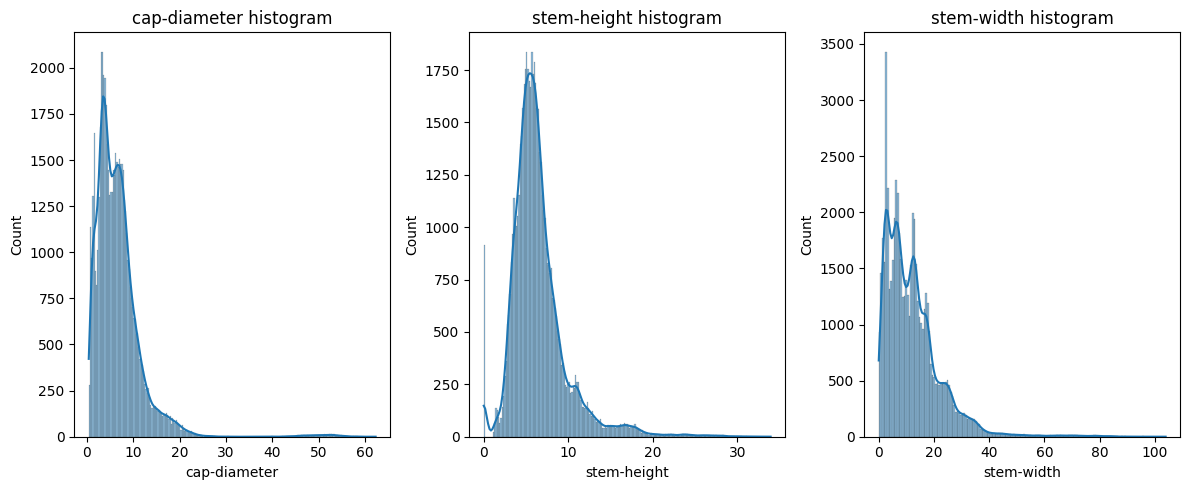

In [41]:
features = ['cap-diameter', 'stem-height', 'stem-width']
i=0
plt.figure(figsize=(12, 5))  

for bf in features:
            plt.subplot(1, 3, i+1)
            sns.histplot(x=bf, data=df,kde=True)
            plt.title(f'{bf} histogram')
            i+=1
plt.tight_layout()
plt.show()

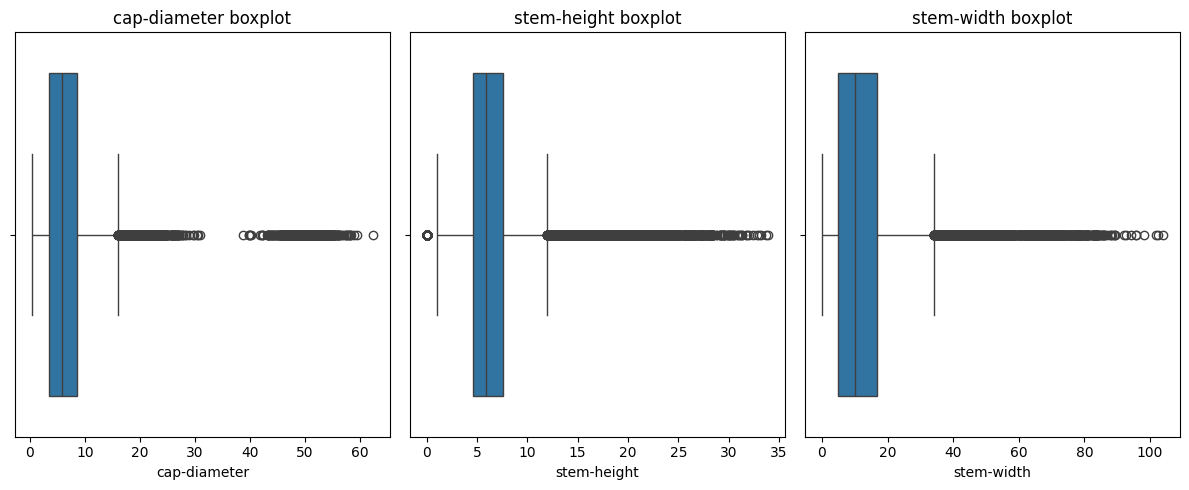

In [42]:
features = ['cap-diameter', 'stem-height', 'stem-width']
i=0
plt.figure(figsize=(12, 5))  

for bf in features:
            plt.subplot(1, 3, i+1)
            sns.boxplot(x=bf, data=df)
            plt.title(f'{bf} boxplot')
            i+=1
plt.tight_layout()
plt.show()

***Conclusion***
- The feature distributions are skewed and contain outliers. so, after research, I found that these outliers are normal in real life. Therefore, I decided not to remove them so the model can learn from them, and I applied Robust Scaling to handle their effect

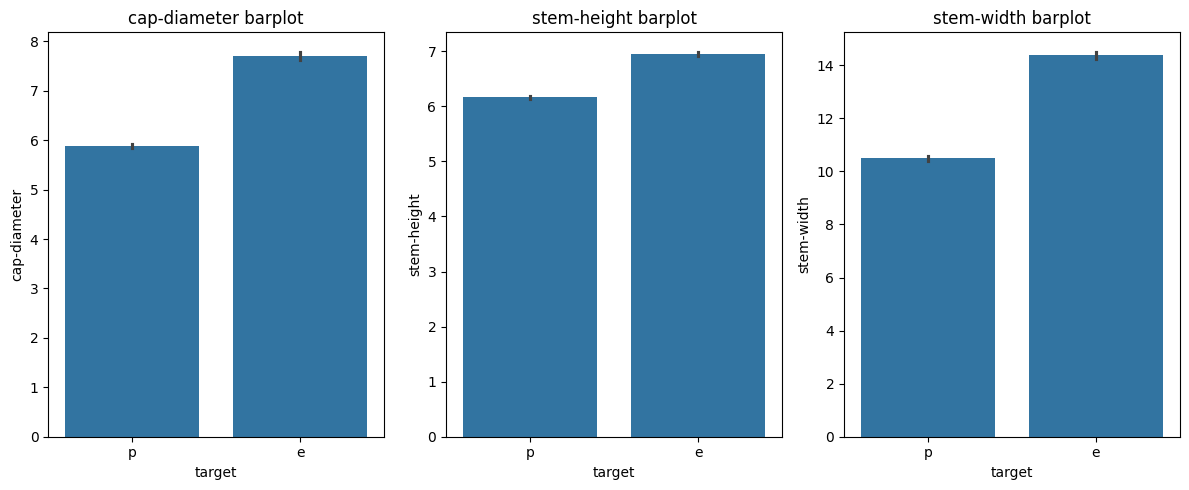

In [43]:
features = ['cap-diameter', 'stem-height', 'stem-width']
i=0
plt.figure(figsize=(12, 5))  

for bf in features:
            plt.subplot(1, 3, i+1)
            sns.barplot(y=bf,x='target', data=df)
            plt.title(f'{bf} barplot')
            i+=1
plt.tight_layout()
plt.show()

***Conclusion***
- As the numerical features increase the likelihood that the mushroom is edible also increases

##### **ANOVA Test**

In [44]:
from sklearn.feature_selection import f_classif
features = ['cap-diameter', 'stem-height', 'stem-width']
X = df[features]
y = df['target']

# Step 2: Apply ANOVA (f_classif) to test significance of features
F_values, p_values = f_classif(X, y)

# Step 3: Display results
for i, feature in enumerate(features):
    print(f"{feature}: F-value = {F_values[i]:.2f}, p-value = {p_values[i]:.3f}")

cap-diameter: F-value = 1747.21, p-value = 0.000
stem-height: F-value = 800.11, p-value = 0.000
stem-width: F-value = 2150.20, p-value = 0.000


***Conclusion***
- All the numerical features provide useful information and contribute value to the model

---

### **Categorical Features**

In [45]:
secondary_mushroom.variables.loc[secondary_mushroom.variables['type'] == 'Categorical',['name']]


,name
0,class
2,cap-shape
3,cap-surface
4,cap-color
5,does-bruise-or-bleed
6,gill-attachment
7,gill-spacing
8,gill-color
11,stem-root
12,stem-surface


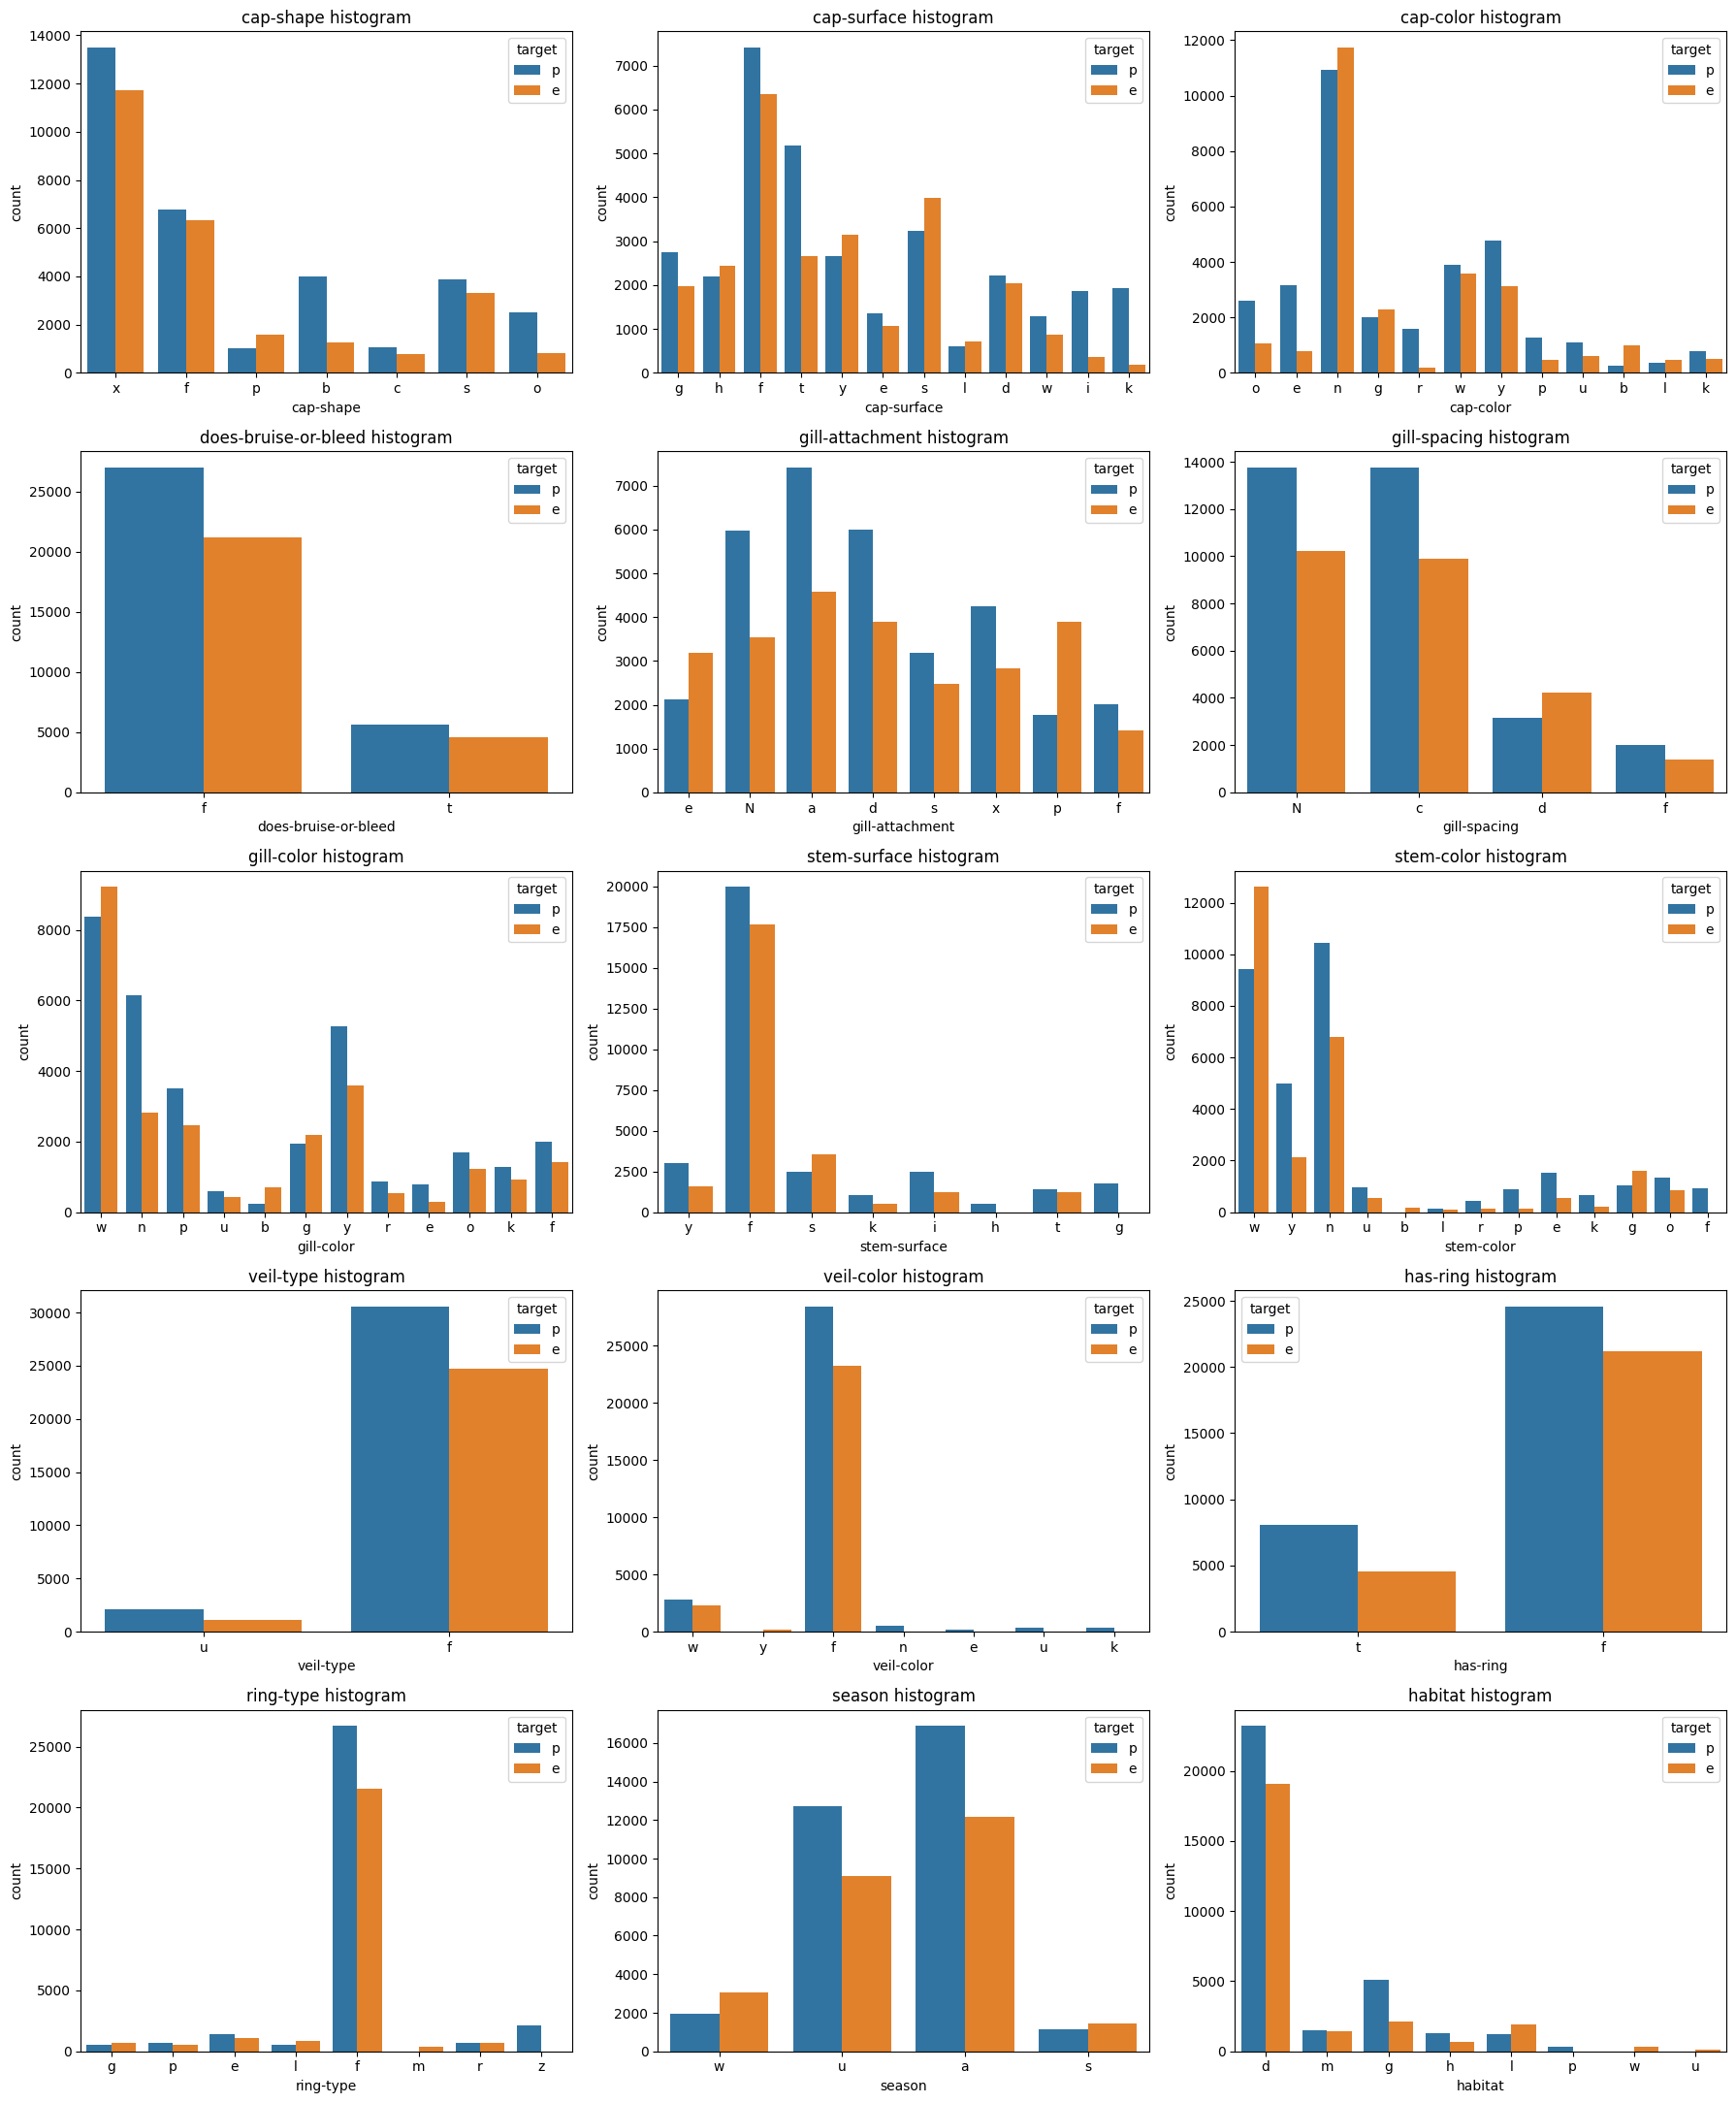

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
                        'gill-attachment','gill-spacing', 'gill-color', 
                        'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring',
                        'ring-type',  'season', 'habitat']

plt.figure(figsize=(18, 30))  

for i, bf in enumerate(categorical_features):
    plt.subplot(7, 3, i+1)  
    sns.countplot(x=bf, data=df, hue='target')
    plt.title(f'{bf} histogram')
   
plt.tight_layout()
plt.show()


#### **Chi square test**

In [47]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

categorical_features = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 
                        'gill-attachment','gill-spacing', 'gill-color', 
                        'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring',
                        'ring-type',  'season', 'habitat']


chi2_results = []

for feature in categorical_features:

    le_feature = LabelEncoder()
    X_encoded = le_feature.fit_transform(df[feature]).reshape(-1, 1)
    
   
    le_target = LabelEncoder()
    y_encoded = le_target.fit_transform(df['target'])
    
    # Chi-square test
    chi_score, p_value = chi2(X_encoded, y_encoded)
    
    chi2_results.append((feature, chi_score[0], p_value[0]))

chi2_df = pd.DataFrame(chi2_results, columns=['Feature', 'Chi2_stat', 'p_value'])
chi2_df = chi2_df.sort_values(by='Chi2_stat', ascending=False)
chi2_df['p_value'] = chi2_df['p_value'].apply(lambda x: f'{x:.10f}')
print(chi2_df)


                 Feature   Chi2_stat       p_value
12             ring-type  754.656193  0.0000000000
4        gill-attachment  670.566674  0.0000000000
8             stem-color  629.083502  0.0000000000
0              cap-shape  459.312980  0.0000000000
11              has-ring  324.744804  0.0000000000
14               habitat  324.168163  0.0000000000
13                season  218.639389  0.0000000000
2              cap-color  153.025346  0.0000000000
9              veil-type  149.007559  0.0000000000
6             gill-color  122.748634  0.0000000000
5           gill-spacing  105.844097  0.0000000000
7           stem-surface   76.669024  0.0000000000
10            veil-color    6.464280  0.0110064217
3   does-bruise-or-bleed    2.285458  0.1305915999
1            cap-surface    0.003727  0.9513228364


***Conclusion***
- Based on the Chi-Square results, we can drop 'cap-surface' and 'does-bruise-or-bleed', but we will keep them until we check the Decision Tree feature importance to be sure

###
<hr style="border:2px solid blue">


# 2. Data Preprocessing 

In [48]:
y.value_counts()

target
p    32683
e    25769
Name: count, dtype: int64

***Conclusion***
- The class imbalance is not significant, so we can use the class_weight='balanced' attribute if needed and apply stratify only when splitting the data

###
<hr style="border:2px solid blue">


## **tree models**

In [49]:
X_tree = df.drop(columns=['target'],inplace=False)
y_tree = df['target']

#### `Encoding`

In [50]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_features = [
    'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
    'gill-attachment', 'gill-spacing', 'gill-color', 'stem-surface',
    'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type',
    'season', 'habitat'
]


ohe = OneHotEncoder(sparse_output=False, drop=None)


encoded_array = ohe.fit_transform(X_tree[categorical_features])


encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(categorical_features))


X_tree = X_tree.drop(columns=categorical_features).reset_index(drop=True)
X_tree = pd.concat([X_tree, encoded_df], axis=1)


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_tree = label_encoder.fit_transform(y_tree)







In [51]:
print(X_tree)

       cap-diameter  stem-height  stem-width  cap-shape_b  cap-shape_c  \
0             15.26        16.95       17.09          0.0          0.0   
1             16.60        17.99       18.19          0.0          0.0   
2             14.07        17.80       17.74          0.0          0.0   
3             14.17        15.77       15.98          0.0          0.0   
4             14.64        16.53       17.20          0.0          0.0   
...             ...          ...         ...          ...          ...   
58447          1.18         3.93        6.22          0.0          0.0   
58448          1.27         3.18        5.43          0.0          0.0   
58449          1.27         3.86        6.37          0.0          0.0   
58450          1.24         3.56        5.44          0.0          0.0   
58451          1.17         3.25        5.45          0.0          0.0   

       cap-shape_f  cap-shape_o  cap-shape_p  cap-shape_s  cap-shape_x  ...  \
0              0.0          0.0 

###
<hr style="border:2px solid blue">


## **Function approx. and distance models**

In [52]:
X_funapprox = df.drop(columns=['target'],inplace=False)
y_funapprox = df['target']

#### `Encoding`

In [53]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_features = [
    'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
    'gill-attachment', 'gill-spacing', 'gill-color', 'stem-surface',
    'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type',
    'season', 'habitat'
]


ohe = OneHotEncoder(sparse_output=False, drop=None)


encoded_array = ohe.fit_transform(X_funapprox[categorical_features])


encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(categorical_features))


X_funapprox = X_funapprox.drop(columns=categorical_features).reset_index(drop=True)
X_funapprox = pd.concat([X_funapprox, encoded_df], axis=1)


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_funapprox = label_encoder.fit_transform(y_funapprox)







In [54]:
X_funapprox.shape, y_funapprox.shape

((58452, 112), (58452,))

#### `Spliting`

In [55]:

from sklearn.model_selection import train_test_split

X_train_funapprox, X_test_funapprox, y_train_funapprox, y_test_funapprox = train_test_split(X_funapprox, y_funapprox, test_size=0.3, random_state=42, shuffle =True,stratify=y_funapprox )

#### `Scaling`

In [56]:
from sklearn.preprocessing import RobustScaler

features = ['cap-diameter', 'stem-height', 'stem-width']

# Initialize the scaler
scaler = RobustScaler()

# Fit on training data and transform both train and test
X_train_funapprox[features] = scaler.fit_transform(X_train_funapprox[features])
X_test_funapprox[features] = scaler.transform(X_test_funapprox[features])

# 3. Model Training & Evaluation 

## Decesion Trees

### Without applying feature selection

##### **Baseline Model**

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [58]:
X_tree_train , X_tree_test, y_tree_train, y_tree_test = train_test_split(X_tree, y_tree, test_size=0.3, random_state=42, stratify=y_tree)

In [59]:
dt2= DecisionTreeClassifier(random_state=42)
dt2.fit(X_tree_train, y_tree_train)


DecisionTreeClassifier(random_state=42)

In [60]:
y_tree_test_pred = dt2.predict(X_tree_test)
y_tree_train_pred = dt2.predict(X_tree_train)
from sklearn.metrics import classification_report, confusion_matrix
print("================Test================")
print(classification_report(y_tree_test, y_tree_test_pred))
print("================Train================")
print(classification_report(y_tree_train, y_tree_train_pred))

================Test================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7731
           1       1.00      1.00      1.00      9805

    accuracy                           1.00     17536
   macro avg       1.00      1.00      1.00     17536
weighted avg       1.00      1.00      1.00     17536

================Train================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18038
           1       1.00      1.00      1.00     22878

    accuracy                           1.00     40916
   macro avg       1.00      1.00      1.00     40916
weighted avg       1.00      1.00      1.00     40916



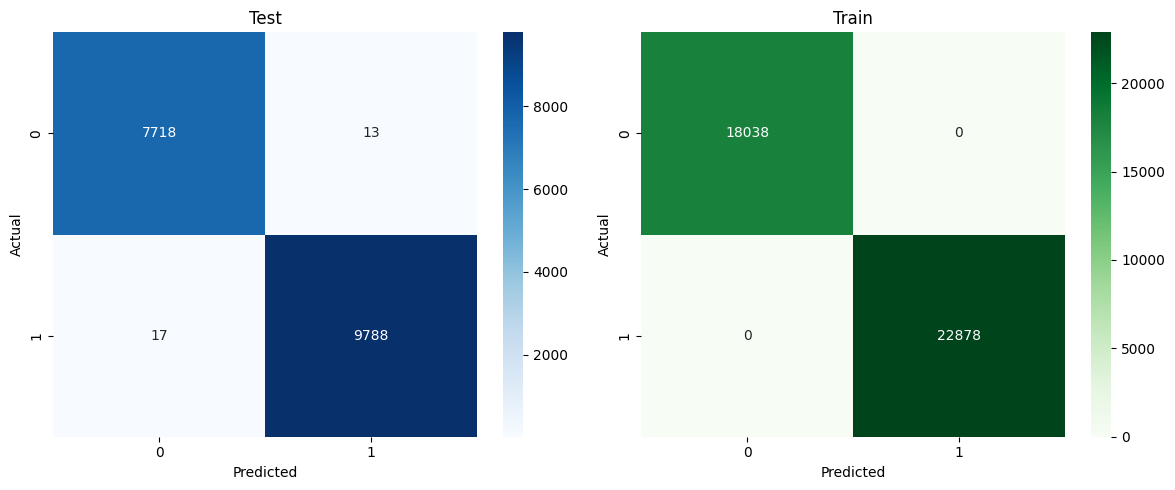

In [61]:
cm_test_tree = confusion_matrix(y_tree_test, y_tree_test_pred)
cm_train_tree = confusion_matrix(y_tree_train, y_tree_train_pred)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Test confusion matrix
sns.heatmap(cm_test_tree, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Test")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Train confusion matrix
sns.heatmap(cm_train_tree, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Train")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score
model1_decisiontree_proba = dt2.predict_proba(X_tree_test)[:, 1]
fpr1_decisiontree, tpr1_decisiontree, _ = roc_curve(y_tree_test, model1_decisiontree_proba)
auc1_decisiontree = roc_auc_score(y_tree_test, model1_decisiontree_proba)

##### **tuned Model**

In [63]:
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    "criterion": ["gini", "entropy"],   #  must match DecisionTreeClassifier param names
    "max_depth": [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
}
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')
grid_search.fit(X_tree_train, y_tree_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20]},
             scoring='f1_weighted')

In [64]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 20}

In [65]:
grid_search.best_score_

np.float64(0.9958918928463744)

In [66]:
y_tree_test_pred = grid_search.best_estimator_.predict(X_tree_test)
y_tree_train_pred = grid_search.best_estimator_.predict(X_tree_train)
from sklearn.metrics import classification_report, confusion_matrix
print("================Test================")
print(classification_report(y_tree_test, y_tree_test_pred))
print("================Train================")
print(classification_report(y_tree_train, y_tree_train_pred))


================Test================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7731
           1       1.00      1.00      1.00      9805

    accuracy                           1.00     17536
   macro avg       1.00      1.00      1.00     17536
weighted avg       1.00      1.00      1.00     17536

================Train================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18038
           1       1.00      1.00      1.00     22878

    accuracy                           1.00     40916
   macro avg       1.00      1.00      1.00     40916
weighted avg       1.00      1.00      1.00     40916



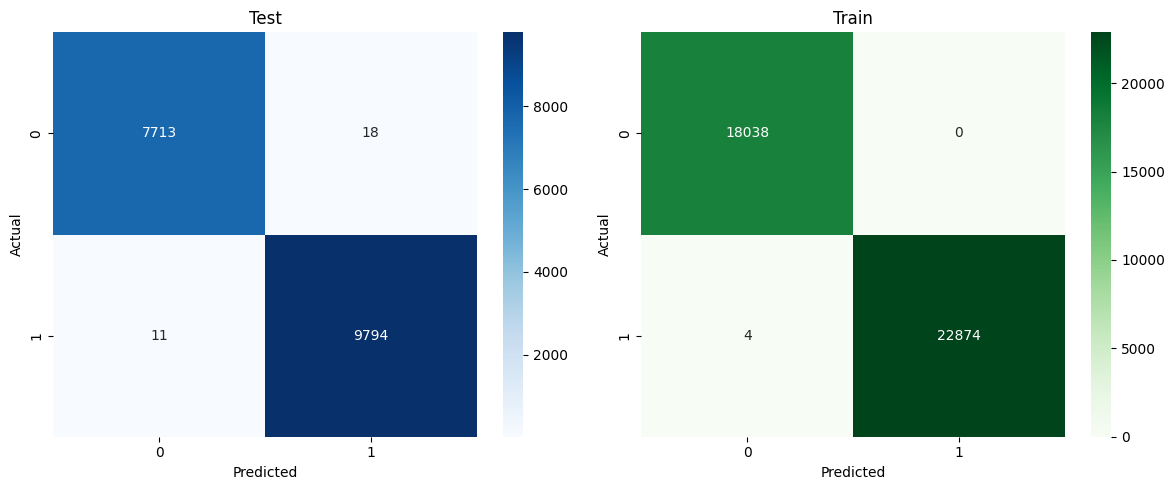

In [67]:
cm_test_tree = confusion_matrix(y_tree_test, y_tree_test_pred)
cm_train_tree = confusion_matrix(y_tree_train, y_tree_train_pred)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Test confusion matrix
sns.heatmap(cm_test_tree, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Test")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Train confusion matrix
sns.heatmap(cm_train_tree, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Train")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score
model2_decisiontree_proba = grid_search.best_estimator_.predict_proba(X_tree_test)[:, 1]
fpr2_decisiontree, tpr2_decisiontree, _ = roc_curve(y_tree_test, model2_decisiontree_proba)
auc2_decisiontree = roc_auc_score(y_tree_test, model2_decisiontree_proba)

###
<hr style="border:2px solid blue">


### After applying feature selection

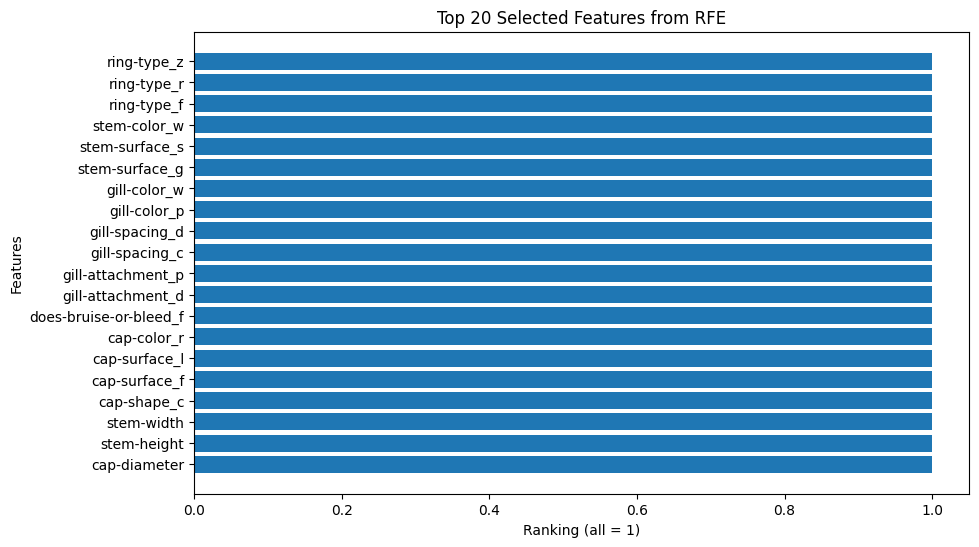

Best 20 features: ['cap-diameter' 'stem-height' 'stem-width' 'cap-shape_c' 'cap-surface_f'
 'cap-surface_l' 'cap-color_r' 'does-bruise-or-bleed_f'
 'gill-attachment_d' 'gill-attachment_p' 'gill-spacing_c' 'gill-spacing_d'
 'gill-color_p' 'gill-color_w' 'stem-surface_g' 'stem-surface_s'
 'stem-color_w' 'ring-type_f' 'ring-type_r' 'ring-type_z']


In [69]:
rfe = RFE(estimator=DecisionTreeClassifier(criterion='gini', max_depth=20,random_state=42), n_features_to_select=20)
rfe.fit(X_tree_train, y_tree_train)
features = rfe.feature_names_in_
rankings = rfe.ranking_


best_features = features[rankings == 1]

best_features_sorted = best_features[np.argsort(best_features)]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(best_features, [1] * len(best_features))  
plt.xlabel('Ranking (all = 1)')
plt.ylabel('Features')
plt.title('Top 20 Selected Features from RFE')
plt.show()

print("Best 20 features:", best_features)

In [70]:
X_tree_train.columns[rfe.support_]

Index(['cap-diameter', 'stem-height', 'stem-width', 'cap-shape_c',
       'cap-surface_f', 'cap-surface_l', 'cap-color_r',
       'does-bruise-or-bleed_f', 'gill-attachment_d', 'gill-attachment_p',
       'gill-spacing_c', 'gill-spacing_d', 'gill-color_p', 'gill-color_w',
       'stem-surface_g', 'stem-surface_s', 'stem-color_w', 'ring-type_f',
       'ring-type_r', 'ring-type_z'],
      dtype='object')

In [71]:
X_train_tree_rfe = rfe.transform(X_tree_train)
X_test_tree_rfe = rfe.transform(X_tree_test)
grid_search.fit(X_train_tree_rfe, y_tree_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20]},
             scoring='f1_weighted')

In [72]:
print(grid_search.best_params_)
y_tree_test_pred = grid_search.best_estimator_.predict(X_test_tree_rfe)
y_tree_train_pred = grid_search.best_estimator_.predict(X_train_tree_rfe)

{'criterion': 'entropy', 'max_depth': 20}


In [73]:
print("===========================Test============================\n")
print(classification_report(y_tree_test, y_tree_test_pred))
print("==========================Train=============================\n")
print(classification_report(y_tree_train, y_tree_train_pred))

===========================Test============================

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7731
           1       0.99      0.99      0.99      9805

    accuracy                           0.99     17536
   macro avg       0.99      0.99      0.99     17536
weighted avg       0.99      0.99      0.99     17536

==========================Train=============================

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18038
           1       0.99      1.00      0.99     22878

    accuracy                           0.99     40916
   macro avg       0.99      0.99      0.99     40916
weighted avg       0.99      0.99      0.99     40916



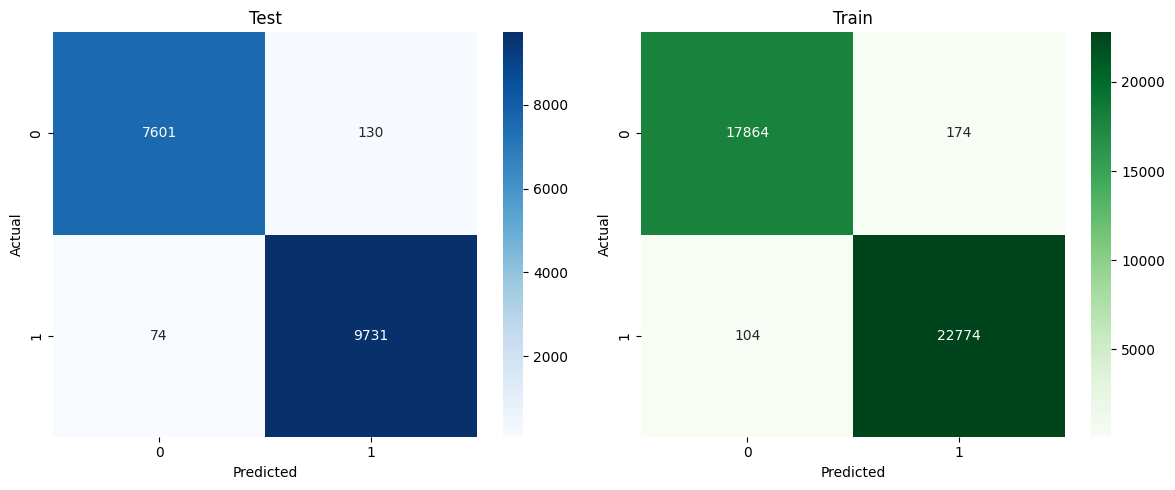

In [74]:
cm_test_tree = confusion_matrix(y_tree_test, y_tree_test_pred)
cm_train_tree = confusion_matrix(y_tree_train, y_tree_train_pred)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Test confusion matrix
sns.heatmap(cm_test_tree, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Test")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Train confusion matrix
sns.heatmap(cm_train_tree, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Train")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
model3_decisiontree_proba = grid_search.best_estimator_.predict_proba(X_test_tree_rfe)[:, 1]
fpr3_decisiontree, tpr3_decisiontree, _ = roc_curve(y_tree_test, model3_decisiontree_proba)
auc3_decisiontree = roc_auc_score(y_tree_test, model3_decisiontree_proba)

###
<hr style="border:2px solid blue">


### Comparing Models
 - Models performed better without feature selection likely because selecting only 20 features caused the loss of useful information.

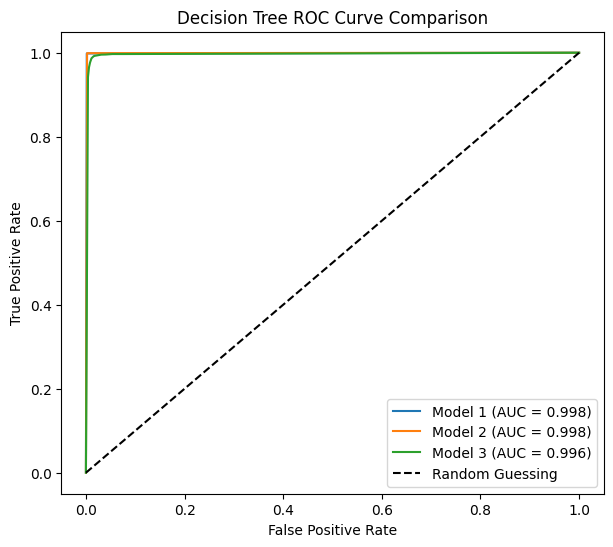

In [76]:
plt.figure(figsize=(7, 6))

plt.plot(fpr1_decisiontree, tpr1_decisiontree, label=f"Model 1 (AUC = {auc1_decisiontree:.3f})")
plt.plot(fpr2_decisiontree, tpr2_decisiontree, label=f"Model 2 (AUC = {auc2_decisiontree:.3f})")
plt.plot(fpr3_decisiontree, tpr3_decisiontree, label=f"Model 3 (AUC = {auc3_decisiontree:.3f})")


plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()


###
<hr style="border:2px solid blue">


## Random Forest

### Without applying feature selection

#### **Baseline model**

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(random_state=42)
rf2.fit(X_tree_train, y_tree_train)


RandomForestClassifier(random_state=42)

In [78]:
y_tree_test_pred = rf2.predict(X_tree_test)
y_tree_train_pred = rf2.predict(X_tree_train)

print("===========================Test============================\n")
print(classification_report(y_tree_test, y_tree_test_pred))
print("==========================Train=============================\n")
print(classification_report(y_tree_train, y_tree_train_pred))

===========================Test============================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7731
           1       1.00      1.00      1.00      9805

    accuracy                           1.00     17536
   macro avg       1.00      1.00      1.00     17536
weighted avg       1.00      1.00      1.00     17536

==========================Train=============================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18038
           1       1.00      1.00      1.00     22878

    accuracy                           1.00     40916
   macro avg       1.00      1.00      1.00     40916
weighted avg       1.00      1.00      1.00     40916



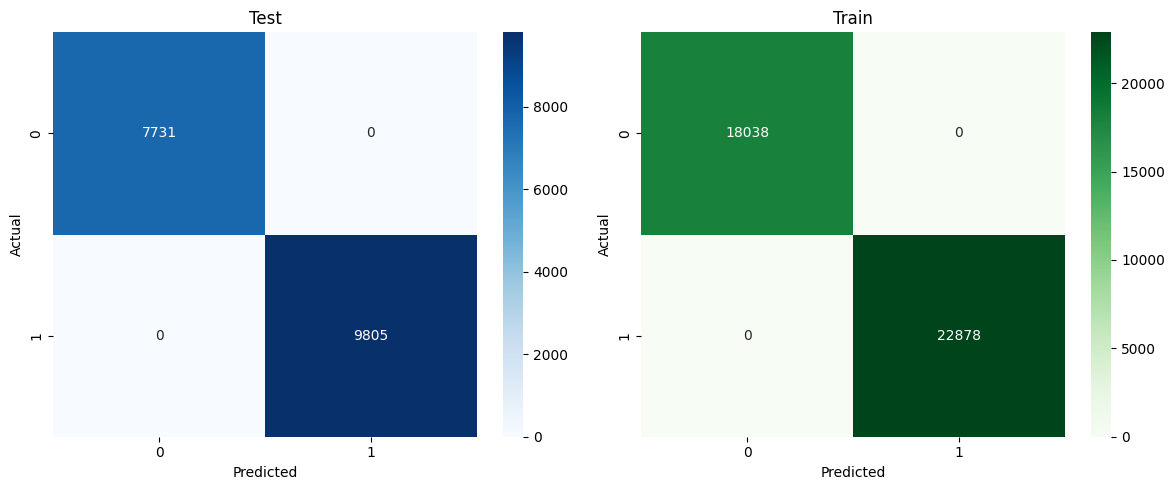

In [79]:
cm_test_tree = confusion_matrix(y_tree_test, y_tree_test_pred)
cm_train_tree = confusion_matrix(y_tree_train, y_tree_train_pred)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Test confusion matrix
sns.heatmap(cm_test_tree, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Test")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Train confusion matrix
sns.heatmap(cm_train_tree, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Train")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score
model1_randomforest_proba = rf2.predict_proba(X_tree_test)[:, 1]
fpr1_randomforest, tpr1_randomforest, _ = roc_curve(y_tree_test, model1_randomforest_proba)
auc1_randomforest = roc_auc_score(y_tree_test, model1_randomforest_proba)

##### **Tuned Model**

In [82]:


rf=RandomForestClassifier(random_state=42)
param_grid = {
    "criterion": ["gini", "entropy"],  
    "max_depth": [5,6,7,8,9,10,11,12,13,14,15],
    "n_estimators": [50, 100, 150, 200, 250, 300]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')
grid_search.fit(X_tree_train, y_tree_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='f1_weighted')

In [83]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 300}

In [84]:
grid_search.best_score_

np.float64(0.9996578416256462)

In [85]:
y_tree_test_pred = grid_search.best_estimator_.predict(X_tree_test)
y_tree_train_pred = grid_search.best_estimator_.predict(X_tree_train)

print("===========================Test============================\n")
print(classification_report(y_tree_test, y_tree_test_pred))
print("==========================Train=============================\n")
print(classification_report(y_tree_train, y_tree_train_pred))

===========================Test============================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7731
           1       1.00      1.00      1.00      9805

    accuracy                           1.00     17536
   macro avg       1.00      1.00      1.00     17536
weighted avg       1.00      1.00      1.00     17536

==========================Train=============================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18038
           1       1.00      1.00      1.00     22878

    accuracy                           1.00     40916
   macro avg       1.00      1.00      1.00     40916
weighted avg       1.00      1.00      1.00     40916



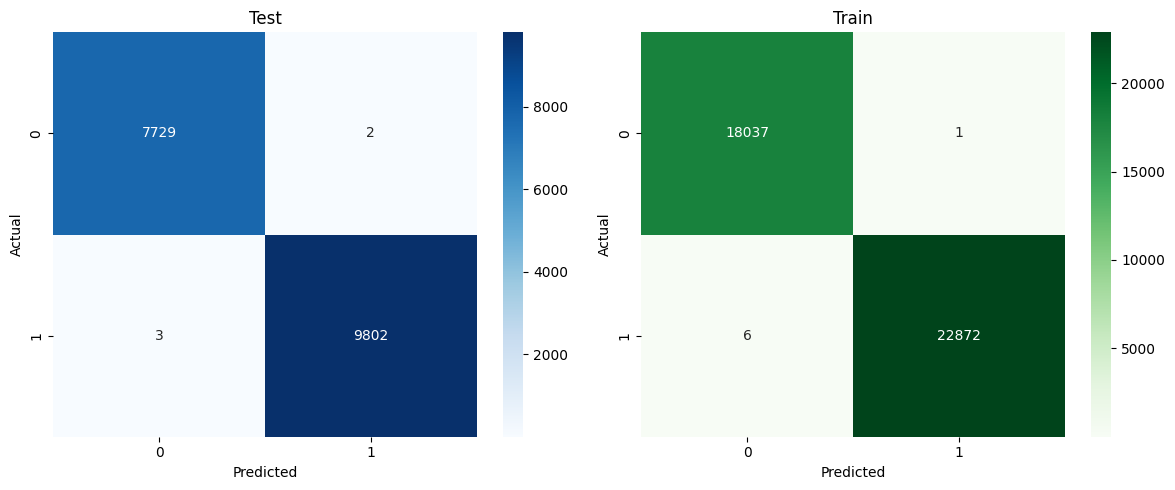

In [86]:
cm_test_tree = confusion_matrix(y_tree_test, y_tree_test_pred)
cm_train_tree = confusion_matrix(y_tree_train, y_tree_train_pred)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Test confusion matrix
sns.heatmap(cm_test_tree, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Test")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Train confusion matrix
sns.heatmap(cm_train_tree, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Train")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [87]:
from sklearn.metrics import roc_curve, roc_auc_score
model2_randomforest_proba = grid_search.best_estimator_.predict_proba(X_tree_test)[:, 1]
fpr2_randomforest, tpr2_randomforest, _ = roc_curve(y_tree_test, model2_randomforest_proba)
auc2_randomforest = roc_auc_score(y_tree_test, model2_randomforest_proba)

###
<hr style="border:2px solid blue">


### After applying feature selection

In [89]:
rfe = RFE(estimator=RandomForestClassifier(criterion='gini', max_depth=15, n_estimators=300,random_state=42), n_features_to_select=20)
rfe.fit(X_tree_train, y_tree_train)

RFE(estimator=RandomForestClassifier(max_depth=15, n_estimators=300,
                                     random_state=42),
    n_features_to_select=20)

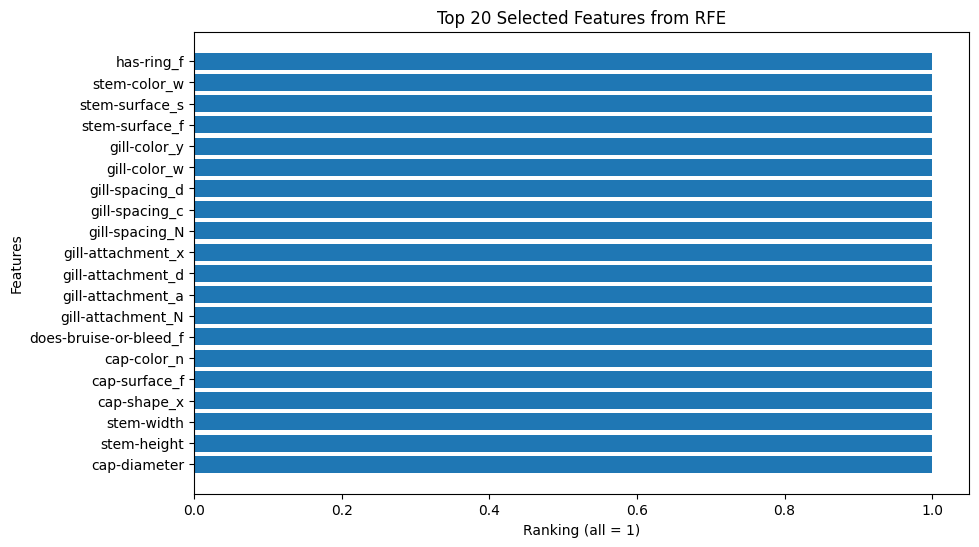

Best 20 features: ['cap-diameter' 'stem-height' 'stem-width' 'cap-shape_x' 'cap-surface_f'
 'cap-color_n' 'does-bruise-or-bleed_f' 'gill-attachment_N'
 'gill-attachment_a' 'gill-attachment_d' 'gill-attachment_x'
 'gill-spacing_N' 'gill-spacing_c' 'gill-spacing_d' 'gill-color_w'
 'gill-color_y' 'stem-surface_f' 'stem-surface_s' 'stem-color_w'
 'has-ring_f']


In [90]:
features = rfe.feature_names_in_
rankings = rfe.ranking_

# Select only top features (ranking == 1)
best_features = features[rankings == 1]

# If you want them sorted in the same order as RFE kept them
best_features_sorted = best_features[np.argsort(best_features)]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(best_features, [1] * len(best_features))  # All selected have rank=1
plt.xlabel('Ranking (all = 1)')
plt.ylabel('Features')
plt.title('Top 20 Selected Features from RFE')
plt.show()

print("Best 20 features:", best_features)

In [91]:
X_train_tree_rfe = rfe.transform(X_tree_train)
X_test_tree_rfe = rfe.transform(X_tree_test)
grid_search.fit(X_train_tree_rfe, y_tree_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='f1_weighted')

In [92]:
print(grid_search.best_params_)
y_tree_test_pred = grid_search.best_estimator_.predict(X_test_tree_rfe)
y_tree_train_pred = grid_search.best_estimator_.predict(X_train_tree_rfe)
print("===========================Test============================\n")
print(classification_report(y_tree_test, y_tree_test_pred))
print("==========================Train=============================\n")
print(classification_report(y_tree_train, y_tree_train_pred))


{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 300}
===========================Test============================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7731
           1       1.00      1.00      1.00      9805

    accuracy                           1.00     17536
   macro avg       1.00      1.00      1.00     17536
weighted avg       1.00      1.00      1.00     17536

==========================Train=============================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18038
           1       1.00      1.00      1.00     22878

    accuracy                           1.00     40916
   macro avg       1.00      1.00      1.00     40916
weighted avg       1.00      1.00      1.00     40916



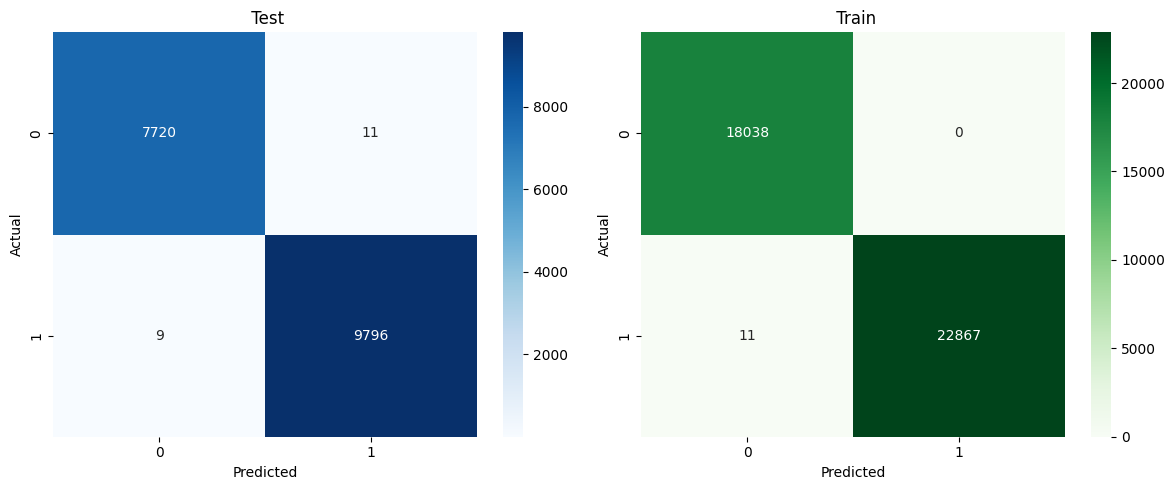

In [93]:
cm_test_tree = confusion_matrix(y_tree_test, y_tree_test_pred)
cm_train_tree = confusion_matrix(y_tree_train, y_tree_train_pred)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Test confusion matrix
sns.heatmap(cm_test_tree, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title(" Test")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Train confusion matrix
sns.heatmap(cm_train_tree, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title(" Train")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

###
<hr style="border:2px solid blue">


In [94]:
from sklearn.metrics import roc_curve, roc_auc_score
model3_randomforest_proba = grid_search.best_estimator_.predict_proba(X_test_tree_rfe)[:, 1]
fpr3_randomforest, tpr3_randomforest, _ = roc_curve(y_tree_test, model3_randomforest_proba)
auc3_randomforest = roc_auc_score(y_tree_test, model3_randomforest_proba)

### Comparing Models
- Models performed better without feature selection, likely because selecting only 20 features caused the loss of useful information.

- The baseline model performed best, as it allows unlimited depth (default value)

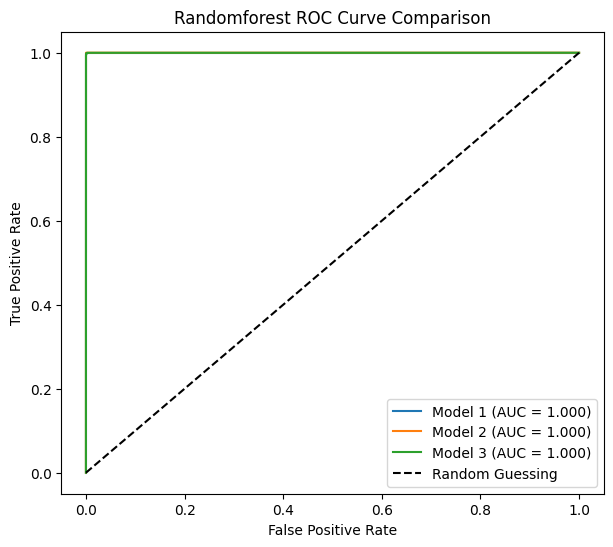

In [95]:
plt.figure(figsize=(7, 6))

plt.plot(fpr1_randomforest, tpr1_randomforest, label=f"Model 1 (AUC = {auc1_randomforest:.3f})")
plt.plot(fpr2_randomforest, tpr2_randomforest, label=f"Model 2 (AUC = {auc2_randomforest:.3f})")
plt.plot(fpr3_randomforest, tpr3_randomforest, label=f"Model 3 (AUC = {auc3_randomforest:.3f})")


plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Randomforest ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()


###
<hr style="border:2px solid blue">


## Logisitc Regression

### Without applying feature selection

##### **Baseline Model**

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [97]:
lr2 = LogisticRegression(random_state=42, max_iter=1000)
lr2.fit(X_train_funapprox, y_train_funapprox)

LogisticRegression(max_iter=1000, random_state=42)

In [98]:
y_pred_test_funapprox= lr2.predict(X_test_funapprox)
y_pred_train_funapprox= lr2.predict(X_train_funapprox)

In [99]:
print("=================Test================")
print(classification_report(y_test_funapprox, y_pred_test_funapprox))
print("=================Train================")
print(classification_report(y_train_funapprox, y_pred_train_funapprox))

=================Test================
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      7731
           1       0.85      0.83      0.84      9805

    accuracy                           0.82     17536
   macro avg       0.82      0.82      0.82     17536
weighted avg       0.82      0.82      0.82     17536

=================Train================
              precision    recall  f1-score   support

           0       0.79      0.81      0.80     18038
           1       0.85      0.83      0.84     22878

    accuracy                           0.82     40916
   macro avg       0.82      0.82      0.82     40916
weighted avg       0.82      0.82      0.82     40916



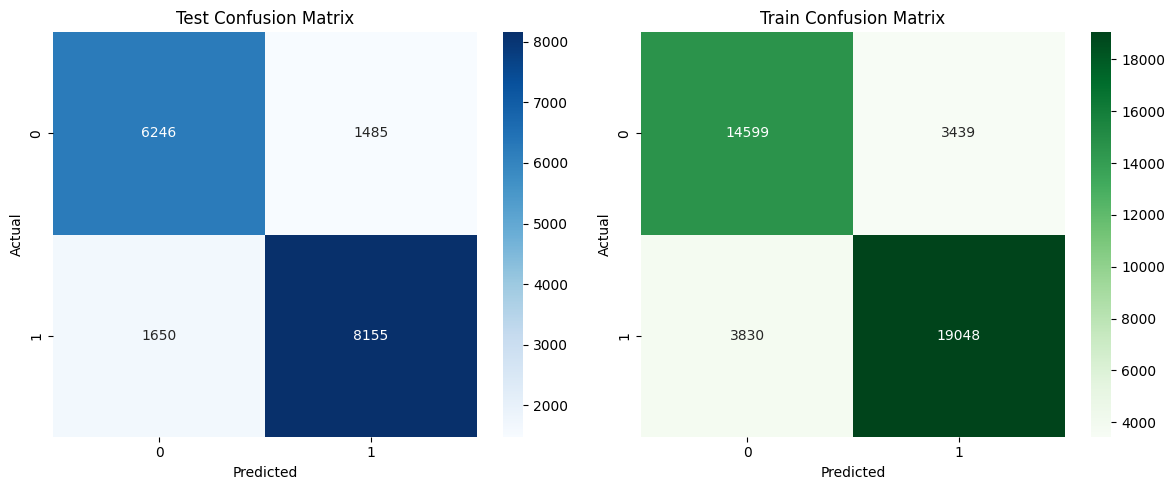

In [100]:
cm_test = confusion_matrix(y_test_funapprox, y_pred_test_funapprox)
cm_train = confusion_matrix(y_train_funapprox, y_pred_train_funapprox)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Test confusion matrix
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Test Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Train confusion matrix
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Train Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [101]:
from sklearn.metrics import roc_curve, roc_auc_score
model1_lr_proba = lr2.predict_proba(X_test_funapprox)[:, 1]
fpr1_lr, tpr1_lr, _ = roc_curve(y_test_funapprox, model1_lr_proba)
auc1_lr = roc_auc_score(y_test_funapprox, model1_lr_proba)

##### **Tuned Model**

In [102]:
lr=LogisticRegression(class_weight='balanced', max_iter=1000,random_state=42)
param_grid = {
    "penalty": ["l1", "l2", "elasticnet", "none"],  
    "C": [0.01, 0.1, 1, 10, 100],
}
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')

In [103]:
grid_search.fit(X_train_funapprox, y_train_funapprox)

c:\Program Files\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
75 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Program Files\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Program Files\Python311\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    s

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='f1_weighted')

In [104]:
grid_search.best_score_

np.float64(0.8164121830641813)

In [105]:
y_pred_test_funapprox= grid_search.best_estimator_.predict(X_test_funapprox)
y_pred_train_funapprox= grid_search.best_estimator_.predict(X_train_funapprox)




In [106]:
print("=================Test================")
print(classification_report(y_test_funapprox, y_pred_test_funapprox))
print("=================Train================")
print(classification_report(y_train_funapprox, y_pred_train_funapprox))

=================Test================
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      7731
           1       0.87      0.79      0.83      9805

    accuracy                           0.82     17536
   macro avg       0.82      0.82      0.82     17536
weighted avg       0.82      0.82      0.82     17536

=================Train================
              precision    recall  f1-score   support

           0       0.76      0.85      0.81     18038
           1       0.87      0.79      0.83     22878

    accuracy                           0.82     40916
   macro avg       0.82      0.82      0.82     40916
weighted avg       0.82      0.82      0.82     40916



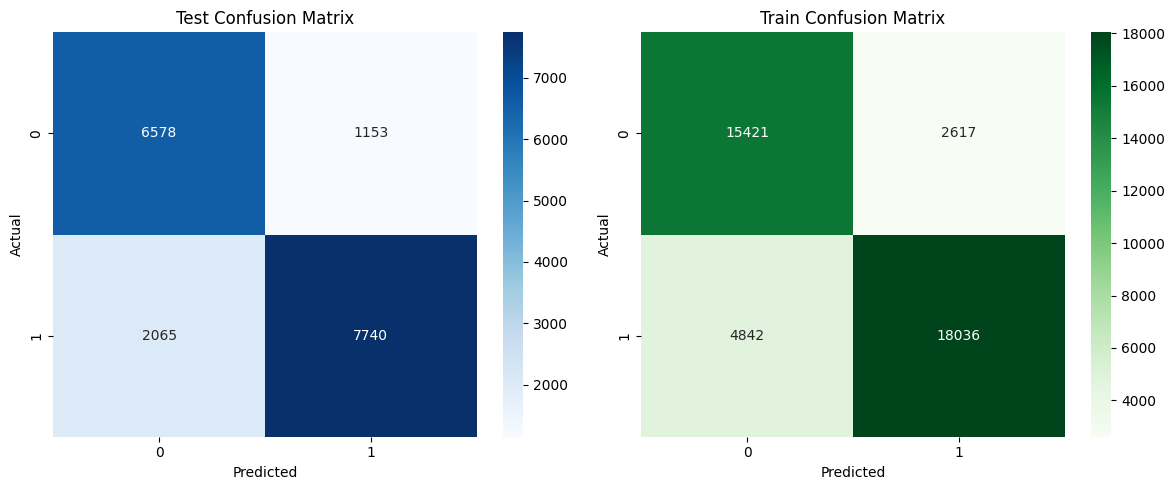

In [107]:
cm_test = confusion_matrix(y_test_funapprox, y_pred_test_funapprox)
cm_train = confusion_matrix(y_train_funapprox, y_pred_train_funapprox)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Test confusion matrix
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Test Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Train confusion matrix
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Train Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [108]:
from sklearn.metrics import roc_curve, roc_auc_score
model2_lr_proba = grid_search.best_estimator_.predict_proba(X_test_funapprox)[:, 1]
fpr2_lr, tpr2_lr, _ = roc_curve(y_test_funapprox, model2_lr_proba)
auc2_lr = roc_auc_score(y_test_funapprox, model2_lr_proba)

###
<hr style="border:2px solid blue">


### After applying feature selection

In [109]:
X_train_funapprox_rfe = rfe.transform(X_train_funapprox)
X_test_funapprox_rfe = rfe.transform(X_test_funapprox)
grid_search.fit(X_train_funapprox_rfe, y_train_funapprox)

c:\Program Files\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
75 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Program Files\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Program Files\Python311\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    s

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='f1_weighted')

In [110]:
grid_search.best_score_

np.float64(0.71006896980454)

In [111]:
y_pred_test_funapprox= grid_search.best_estimator_.predict(X_test_funapprox_rfe)
y_pred_train_funapprox= grid_search.best_estimator_.predict(X_train_funapprox_rfe)

In [112]:
print("=================Test================")
print(classification_report(y_test_funapprox, y_pred_test_funapprox))
print("=================Train================")
print(classification_report(y_train_funapprox, y_pred_train_funapprox))

=================Test================
              precision    recall  f1-score   support

           0       0.66      0.72      0.68      7731
           1       0.76      0.70      0.73      9805

    accuracy                           0.71     17536
   macro avg       0.71      0.71      0.71     17536
weighted avg       0.71      0.71      0.71     17536

=================Train================
              precision    recall  f1-score   support

           0       0.66      0.72      0.69     18038
           1       0.76      0.70      0.73     22878

    accuracy                           0.71     40916
   macro avg       0.71      0.71      0.71     40916
weighted avg       0.71      0.71      0.71     40916



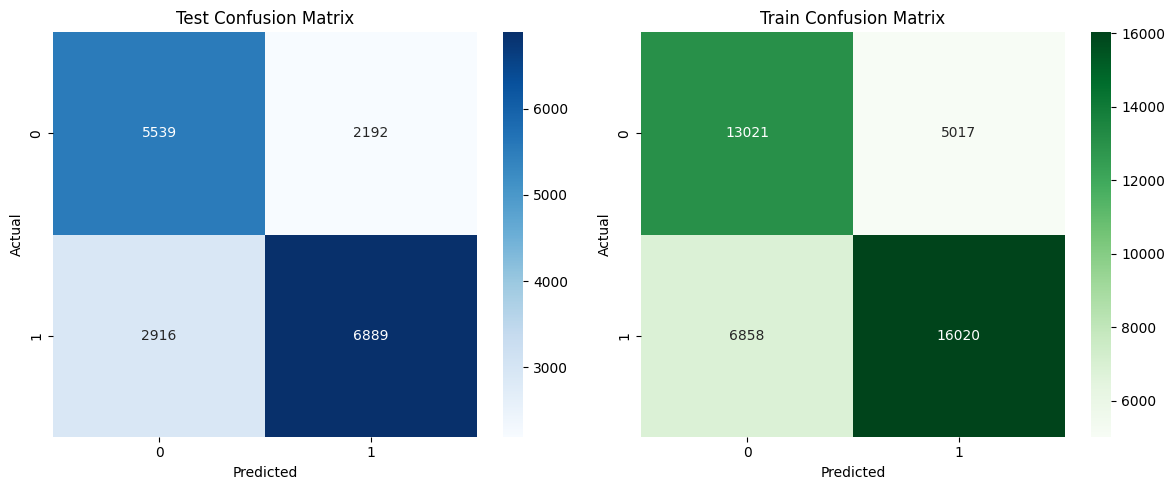

In [113]:
cm_test = confusion_matrix(y_test_funapprox, y_pred_test_funapprox)
cm_train = confusion_matrix(y_train_funapprox, y_pred_train_funapprox)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Test confusion matrix
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Test Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Train confusion matrix
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Train Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [114]:
from sklearn.metrics import roc_curve, roc_auc_score
model3_lr_proba = grid_search.best_estimator_.predict_proba(X_test_funapprox_rfe)[:, 1]
fpr3_lr, tpr3_lr, _ = roc_curve(y_test_funapprox, model3_lr_proba)
auc3_lr = roc_auc_score(y_test_funapprox, model3_lr_proba)

###
<hr style="border:2px solid blue">


### Comparing Models
- All the Logistic Regression models underfit likely because the data is too complex to be separated with just a linear decision boundary

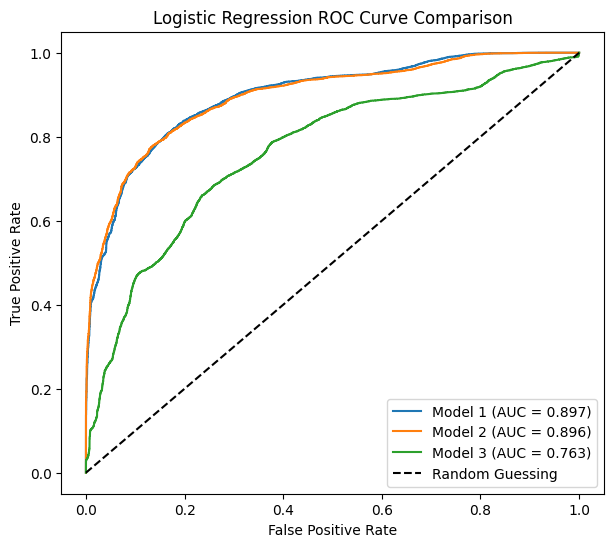

In [115]:
plt.figure(figsize=(7, 6))

plt.plot(fpr1_lr, tpr1_lr, label=f"Model 1 (AUC = {auc1_lr:.3f})")
plt.plot(fpr2_lr, tpr2_lr, label=f"Model 2 (AUC = {auc2_lr:.3f})")
plt.plot(fpr3_lr, tpr3_lr, label=f"Model 3 (AUC = {auc3_lr:.3f})")


plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()


###
<hr style="border:2px solid blue">


## KNN

#### Without applying feature selection

##### **Baseline Model**

In [116]:
from sklearn.neighbors import  KNeighborsClassifier  
knn2 = KNeighborsClassifier()
knn2.fit(X_train_funapprox, y_train_funapprox)

KNeighborsClassifier()

In [117]:

y_pred_test_funapprox=  knn2.predict(X_test_funapprox)
y_pred_train_funapprox=  knn2.predict(X_train_funapprox)
print("=================Test================")
print(classification_report(y_test_funapprox, y_pred_test_funapprox))
print("=================Train================")
print(classification_report(y_train_funapprox, y_pred_train_funapprox))


=================Test================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7731
           1       1.00      1.00      1.00      9805

    accuracy                           1.00     17536
   macro avg       1.00      1.00      1.00     17536
weighted avg       1.00      1.00      1.00     17536

=================Train================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18038
           1       1.00      1.00      1.00     22878

    accuracy                           1.00     40916
   macro avg       1.00      1.00      1.00     40916
weighted avg       1.00      1.00      1.00     40916



In [118]:
cm_test = confusion_matrix(y_test_funapprox, y_pred_test_funapprox)
cm_train = confusion_matrix(y_train_funapprox, y_pred_train_funapprox)


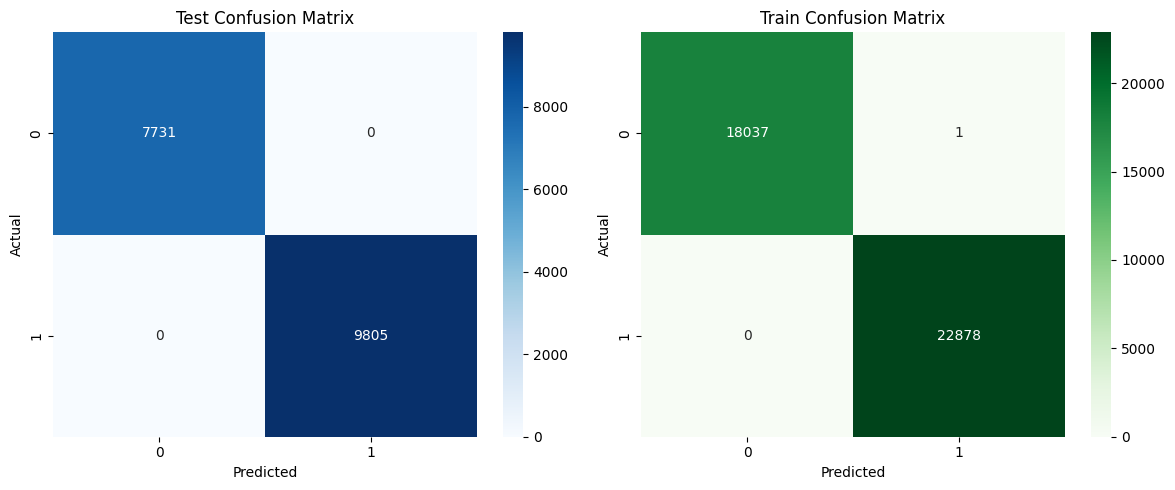

In [119]:
cm_test = confusion_matrix(y_test_funapprox, y_pred_test_funapprox)
cm_train = confusion_matrix(y_train_funapprox, y_pred_train_funapprox)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Test confusion matrix
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Test Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Train confusion matrix
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Train Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [120]:
from sklearn.metrics import roc_curve, roc_auc_score
model1_knn_proba = knn2.predict_proba(X_test_funapprox)[:, 1]
fpr1_knn, tpr1_knn, _ = roc_curve(y_test_funapprox, model1_knn_proba)
auc1_knn = roc_auc_score(y_test_funapprox, model1_knn_proba)

##### **Tuned Model**

In [121]:
from sklearn.neighbors import  KNeighborsClassifier  

knn=KNeighborsClassifier()
param_grid = {
    "n_neighbors": [3,5,7,9,11,13,15],  
    "weights": ['uniform', 'distance'],
    "metric": ['euclidean', 'manhattan', 'minkowski'],
}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')
grid_search.fit(X_train_funapprox, y_train_funapprox)
grid_search.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

In [122]:
grid_search.best_score_

np.float64(0.9999755587268144)

In [123]:

y_pred_test_funapprox=  grid_search.best_estimator_.predict(X_test_funapprox)
y_pred_train_funapprox=  grid_search.best_estimator_.predict(X_train_funapprox)
print("=================Test================")
print(classification_report(y_test_funapprox, y_pred_test_funapprox))
print("=================Train================")
print(classification_report(y_train_funapprox, y_pred_train_funapprox))


=================Test================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7731
           1       1.00      1.00      1.00      9805

    accuracy                           1.00     17536
   macro avg       1.00      1.00      1.00     17536
weighted avg       1.00      1.00      1.00     17536

=================Train================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18038
           1       1.00      1.00      1.00     22878

    accuracy                           1.00     40916
   macro avg       1.00      1.00      1.00     40916
weighted avg       1.00      1.00      1.00     40916



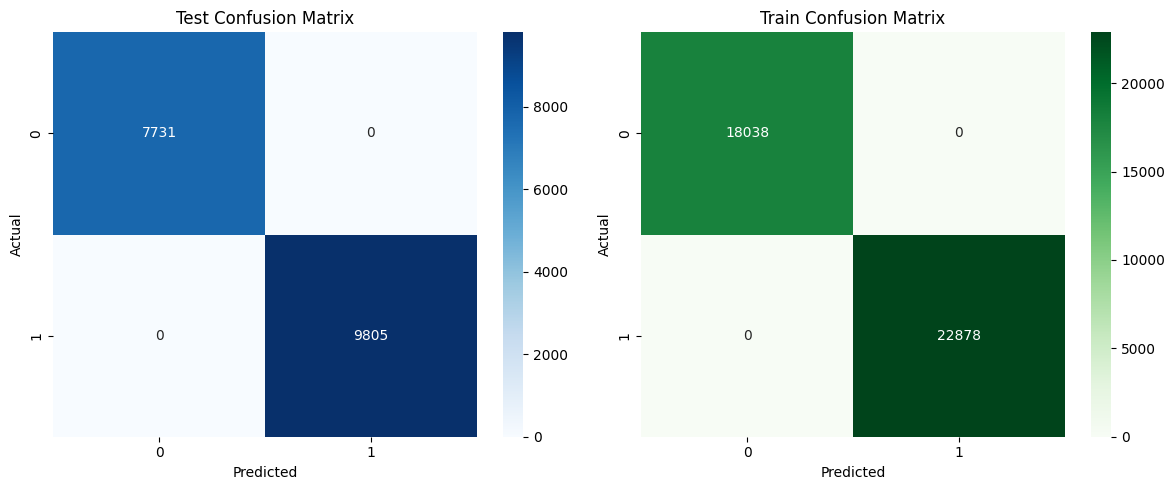

In [124]:
cm_test = confusion_matrix(y_test_funapprox, y_pred_test_funapprox)
cm_train = confusion_matrix(y_train_funapprox, y_pred_train_funapprox)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Test confusion matrix
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Test Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Train confusion matrix
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Train Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [125]:
from sklearn.metrics import roc_curve, roc_auc_score
model2_knn_proba = grid_search.best_estimator_.predict_proba(X_test_funapprox)[:, 1]
fpr2_knn, tpr2_knn, _ = roc_curve(y_test_funapprox, model2_knn_proba)
auc2_knn = roc_auc_score(y_test_funapprox, model2_knn_proba)

###
<hr style="border:2px solid blue">


### After applying feature selection

In [126]:
X_funapprox.columns[rfe.support_]

Index(['cap-diameter', 'stem-height', 'stem-width', 'cap-shape_x',
       'cap-surface_f', 'cap-color_n', 'does-bruise-or-bleed_f',
       'gill-attachment_N', 'gill-attachment_a', 'gill-attachment_d',
       'gill-attachment_x', 'gill-spacing_N', 'gill-spacing_c',
       'gill-spacing_d', 'gill-color_w', 'gill-color_y', 'stem-surface_f',
       'stem-surface_s', 'stem-color_w', 'has-ring_f'],
      dtype='object')

In [127]:
knn=KNeighborsClassifier()
param_grid = {
    "n_neighbors": [3,5,7,9,11,13,15],  
    "weights": ['uniform', 'distance'],
    "metric": ['euclidean', 'manhattan', 'minkowski'],
}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')

In [128]:
X_train_funapprox_rfe = rfe.transform(X_train_funapprox)
X_test_funapprox_rfe = rfe.transform(X_test_funapprox)
grid_search.fit(X_train_funapprox_rfe, y_train_funapprox)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [129]:
grid_search.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

In [130]:
grid_search.best_score_

np.float64(0.9989979327691639)

In [131]:
y_pred_test_funapprox= grid_search.best_estimator_.predict(X_test_funapprox_rfe)
y_pred_train_funapprox= grid_search.best_estimator_.predict(X_train_funapprox_rfe)

In [132]:
print("=================Test================")
print(classification_report(y_test_funapprox, y_pred_test_funapprox))
print("=================Train================")
print(classification_report(y_train_funapprox, y_pred_train_funapprox))

=================Test================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7731
           1       1.00      1.00      1.00      9805

    accuracy                           1.00     17536
   macro avg       1.00      1.00      1.00     17536
weighted avg       1.00      1.00      1.00     17536

=================Train================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18038
           1       1.00      1.00      1.00     22878

    accuracy                           1.00     40916
   macro avg       1.00      1.00      1.00     40916
weighted avg       1.00      1.00      1.00     40916



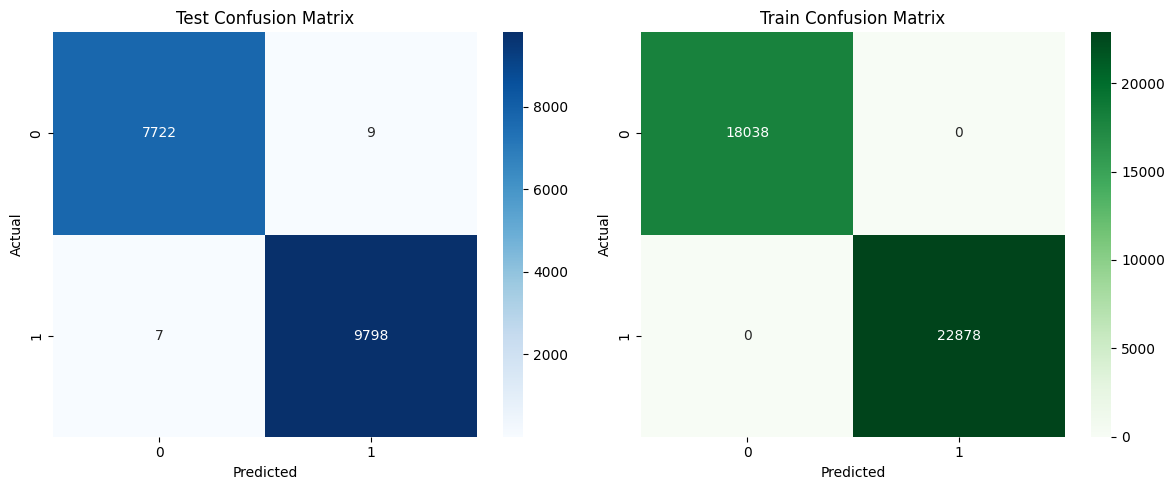

In [133]:
cm_test = confusion_matrix(y_test_funapprox, y_pred_test_funapprox)
cm_train = confusion_matrix(y_train_funapprox, y_pred_train_funapprox)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Test confusion matrix
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Test Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Train confusion matrix
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Train Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [134]:
from sklearn.metrics import roc_curve, roc_auc_score
model3_knn_proba = grid_search.best_estimator_.predict_proba(X_test_funapprox_rfe)[:, 1]
fpr3_knn, tpr3_knn, _ = roc_curve(y_test_funapprox, model3_knn_proba)
auc3_knn = roc_auc_score(y_test_funapprox, model3_knn_proba)

###
<hr style="border:2px solid blue">


### Comparing Models
- KNN performed very well likely because it can make non-linear decision boundaries.
- The tuned KNN model achieved the best performance overall

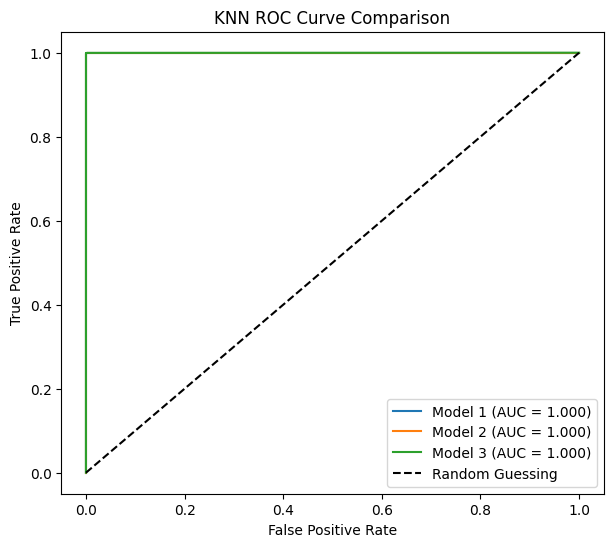

In [135]:
plt.figure(figsize=(7, 6))

plt.plot(fpr1_knn, tpr1_knn, label=f"Model 1 (AUC = {auc1_knn:.3f})")
plt.plot(fpr2_knn, tpr2_knn, label=f"Model 2 (AUC = {auc2_knn:.3f})")
plt.plot(fpr3_knn, tpr3_knn, label=f"Model 3 (AUC = {auc3_knn:.3f})")


plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()


In [136]:
fpr1_decisiontree, tpr1_decisiontree, auc1_decisiontree
fpr1_randomforest, tpr1_randomforest, auc1_randomforest
fpr1_lr, tpr1_lr, auc1_lr
fpr2_knn, tpr2_knn, auc2_knn

(array([0., 0., 1.]), array([0., 1., 1.]), np.float64(1.0))

###
<hr style="border:2px solid blue">


## Naive Bayes

#### Without applying feature selection

##### **Baseline Model**

In [137]:
from sklearn.naive_bayes import GaussianNB
gnb2 = GaussianNB()
gnb2.fit(X_train_funapprox, y_train_funapprox)


GaussianNB()

In [138]:
y_pred_test_funapprox=  gnb2.predict(X_test_funapprox)
y_pred_train_funapprox=  gnb2.predict(X_train_funapprox)
print("=================Test================")
print(classification_report(y_test_funapprox, y_pred_test_funapprox))
print("=================Train================")
print(classification_report(y_train_funapprox, y_pred_train_funapprox))

=================Test================
              precision    recall  f1-score   support

           0       0.54      0.98      0.70      7731
           1       0.95      0.36      0.52      9805

    accuracy                           0.63     17536
   macro avg       0.75      0.67      0.61     17536
weighted avg       0.77      0.63      0.60     17536

=================Train================
              precision    recall  f1-score   support

           0       0.54      0.97      0.70     18038
           1       0.95      0.35      0.51     22878

    accuracy                           0.63     40916
   macro avg       0.74      0.66      0.61     40916
weighted avg       0.77      0.63      0.59     40916



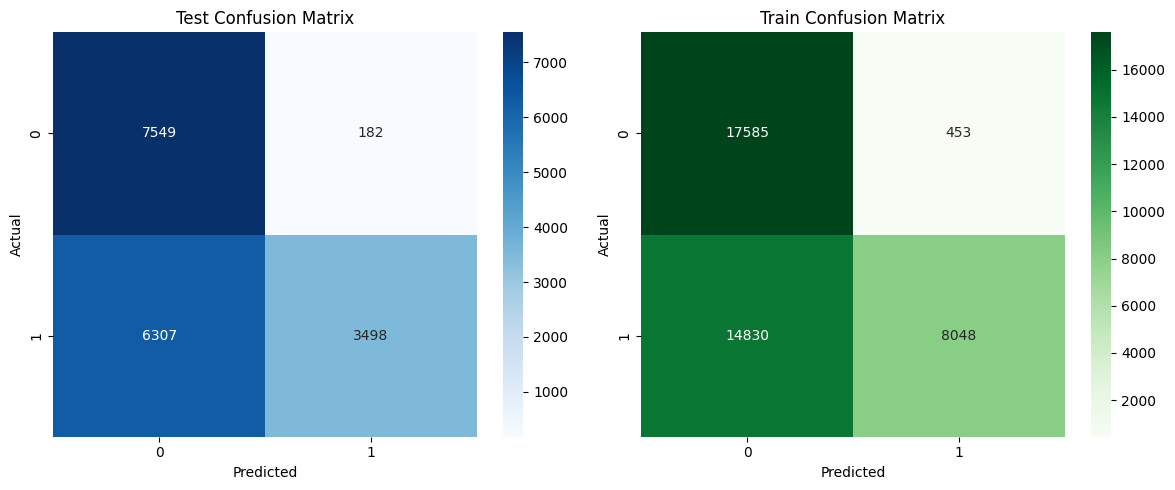

In [139]:
cm_test = confusion_matrix(y_test_funapprox, y_pred_test_funapprox)
cm_train = confusion_matrix(y_train_funapprox, y_pred_train_funapprox)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Test confusion matrix
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Test Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Train confusion matrix
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Train Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [140]:
from sklearn.metrics import roc_curve, roc_auc_score
model1_naive_proba = gnb2.predict_proba(X_test_funapprox)[:, 1]
fpr1_naive, tpr1_naive, _ = roc_curve(y_test_funapprox, model1_naive_proba)
auc1_naive = roc_auc_score(y_test_funapprox, model1_naive_proba)

##### **`Tuned Model`**

In [141]:
from sklearn.model_selection import GridSearchCV

gnb = GaussianNB()
param_grid = {
    "var_smoothing": [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 1],

}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')
grid_search.fit(X_train_funapprox, y_train_funapprox)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='f1_weighted')

In [142]:
grid_search.best_score_

np.float64(0.7333595076128588)

In [143]:
y_pred_test_funapprox=  grid_search.best_estimator_.predict(X_test_funapprox)
y_pred_train_funapprox=  grid_search.best_estimator_.predict(X_train_funapprox)
print("=================Test================")
print(classification_report(y_test_funapprox, y_pred_test_funapprox))
print("=================Train================")
print(classification_report(y_train_funapprox, y_pred_train_funapprox))

=================Test================
              precision    recall  f1-score   support

           0       0.65      0.85      0.74      7731
           1       0.85      0.64      0.73      9805

    accuracy                           0.74     17536
   macro avg       0.75      0.75      0.74     17536
weighted avg       0.76      0.74      0.74     17536

=================Train================
              precision    recall  f1-score   support

           0       0.65      0.86      0.74     18038
           1       0.85      0.64      0.73     22878

    accuracy                           0.74     40916
   macro avg       0.75      0.75      0.74     40916
weighted avg       0.76      0.74      0.74     40916



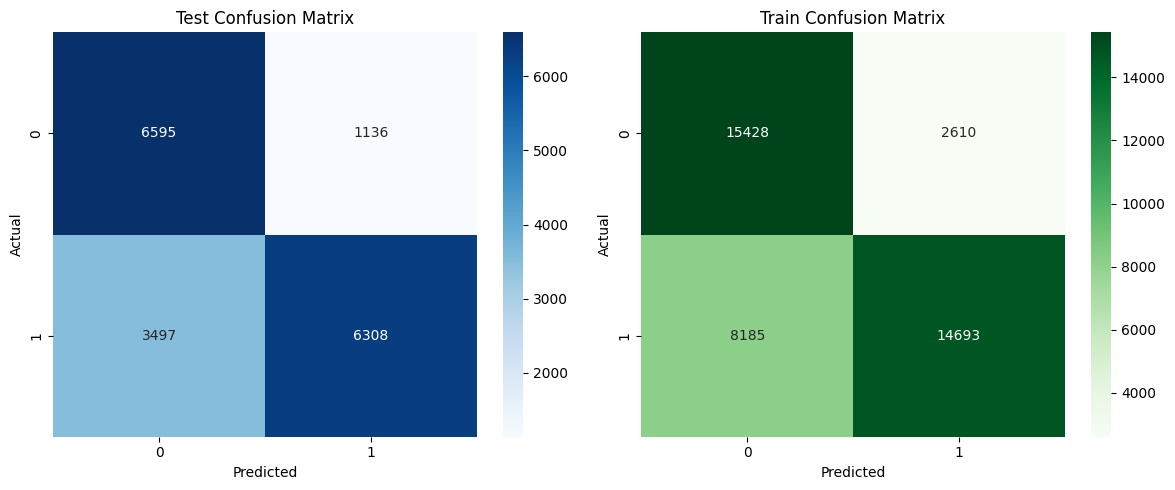

In [144]:
cm_test = confusion_matrix(y_test_funapprox, y_pred_test_funapprox)
cm_train = confusion_matrix(y_train_funapprox, y_pred_train_funapprox)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Test confusion matrix
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Test Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Train confusion matrix
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Train Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [145]:
from sklearn.metrics import roc_curve, roc_auc_score
model2_naive_proba= grid_search.best_estimator_.predict_proba(X_test_funapprox)[:, 1]
fpr2_naive, tpr2_naive, _ = roc_curve(y_test_funapprox, model2_naive_proba)
auc2_naive = roc_auc_score(y_test_funapprox, model2_naive_proba)

####
<hr style="border:2px solid blue">


#### After applying feature selection

In [146]:
X_train_funapprox_rfe = rfe.transform(X_train_funapprox)
X_test_funapprox_rfe = rfe.transform(X_test_funapprox)
grid_search.fit(X_train_funapprox_rfe, y_train_funapprox)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='f1_weighted')

In [147]:
grid_search.best_params_

{'var_smoothing': 0.01}

In [148]:
grid_search.best_score_

np.float64(0.5976121862451718)

In [149]:
y_pred_test_funapprox= grid_search.best_estimator_.predict(X_test_funapprox_rfe)
y_pred_train_funapprox= grid_search.best_estimator_.predict(X_train_funapprox_rfe)

In [150]:
print("=================Test================")
print(classification_report(y_test_funapprox, y_pred_test_funapprox))
print("=================Train================")
print(classification_report(y_train_funapprox, y_pred_train_funapprox))

=================Test================
              precision    recall  f1-score   support

           0       0.58      0.40      0.48      7731
           1       0.62      0.77      0.69      9805

    accuracy                           0.61     17536
   macro avg       0.60      0.59      0.58     17536
weighted avg       0.60      0.61      0.60     17536

=================Train================
              precision    recall  f1-score   support

           0       0.59      0.40      0.47     18038
           1       0.62      0.78      0.69     22878

    accuracy                           0.61     40916
   macro avg       0.60      0.59      0.58     40916
weighted avg       0.61      0.61      0.60     40916



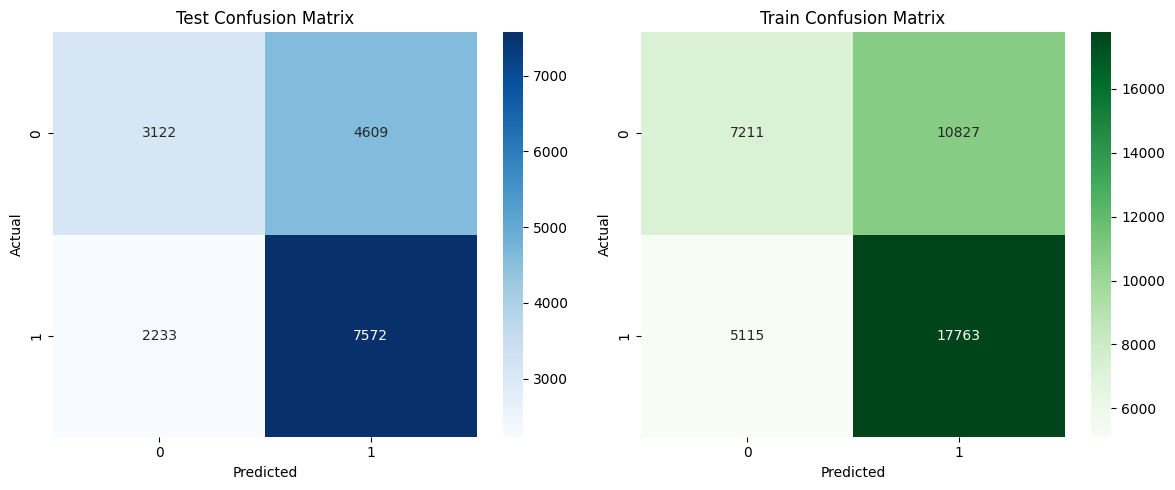

In [151]:
cm_test = confusion_matrix(y_test_funapprox, y_pred_test_funapprox)
cm_train = confusion_matrix(y_train_funapprox, y_pred_train_funapprox)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Test confusion matrix
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Test Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Train confusion matrix
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Train Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [152]:
from sklearn.metrics import roc_curve, roc_auc_score
model3_naive_proba=grid_search.best_estimator_.predict_proba(X_test_funapprox_rfe)[:, 1]
fpr3_naive, tpr3_naive, _ = roc_curve(y_test_funapprox, model3_naive_proba)
auc3_naive = roc_auc_score(y_test_funapprox, model3_naive_proba)

###
<hr style="border:2px solid blue">


#### Comparing Models
- Naive Bayes performed poorly because it assumes feature independence while the features are dependent

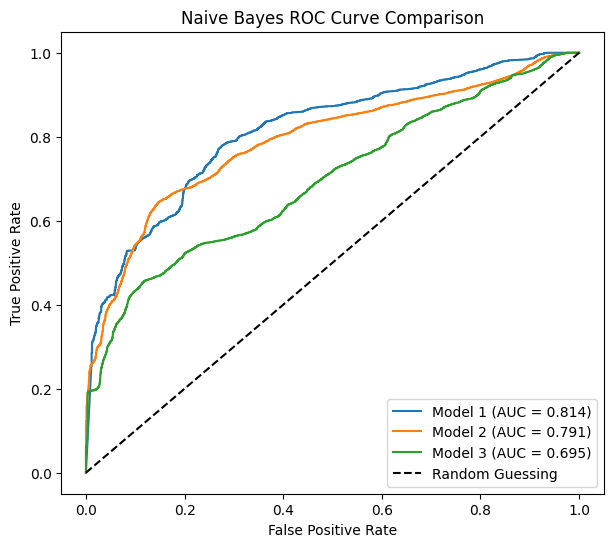

In [153]:
plt.figure(figsize=(7, 6))

plt.plot(fpr1_naive, tpr1_naive, label=f"Model 1 (AUC = {auc1_naive:.3f})")
plt.plot(fpr2_naive, tpr2_naive, label=f"Model 2 (AUC = {auc2_naive:.3f})")
plt.plot(fpr3_naive, tpr3_naive, label=f"Model 3 (AUC = {auc3_naive:.3f})")


plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()


###
<hr style="border:2px solid blue">


## SVM

### Without applying feature selection

##### **Baseline Model**

In [154]:
from sklearn.svm import SVC
svc2 = SVC(random_state=42,probability=True)
svc2.fit(X_train_funapprox, y_train_funapprox)
y_pred_test_funapprox=  svc2.predict(X_test_funapprox)
y_pred_train_funapprox=  svc2.predict(X_train_funapprox)
print("=================Test================")
print(classification_report(y_test_funapprox, y_pred_test_funapprox))
print("=================Train================")
print(classification_report(y_train_funapprox, y_pred_train_funapprox))

=================Test================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7731
           1       1.00      1.00      1.00      9805

    accuracy                           1.00     17536
   macro avg       1.00      1.00      1.00     17536
weighted avg       1.00      1.00      1.00     17536

=================Train================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18038
           1       1.00      1.00      1.00     22878

    accuracy                           1.00     40916
   macro avg       1.00      1.00      1.00     40916
weighted avg       1.00      1.00      1.00     40916



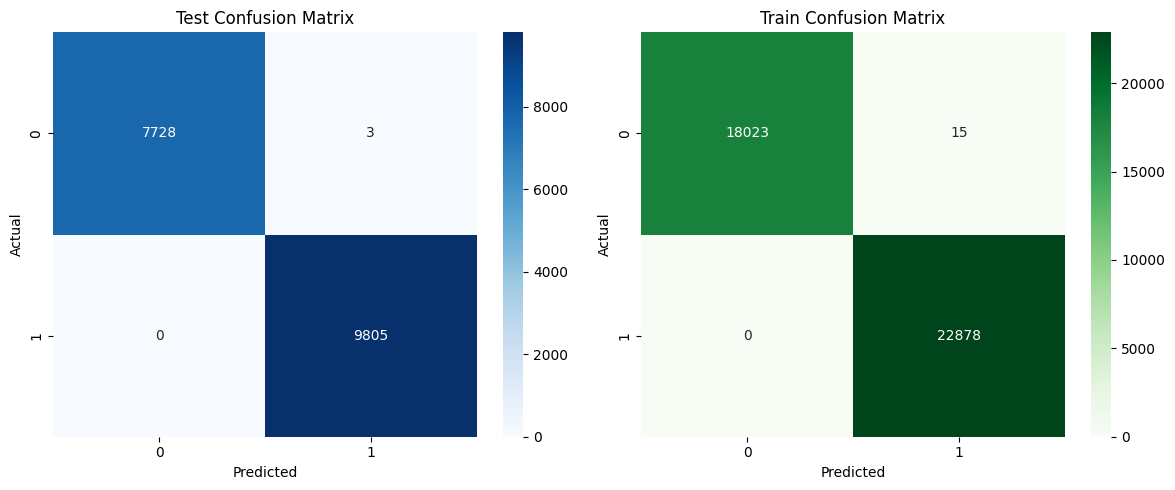

In [155]:
cm_test = confusion_matrix(y_test_funapprox, y_pred_test_funapprox)
cm_train = confusion_matrix(y_train_funapprox, y_pred_train_funapprox)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Test confusion matrix
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Test Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Train confusion matrix
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Train Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [156]:
from sklearn.metrics import roc_curve, roc_auc_score
model1_svm_proba = svc2.predict_proba(X_test_funapprox)[:, 1]
fpr1_svm, tpr1_svm, _ = roc_curve(y_test_funapprox, model1_svm_proba)
auc1_svm = roc_auc_score(y_test_funapprox, model1_svm_proba)

##### **Tuned Model**

In [157]:

from sklearn.model_selection import GridSearchCV
svc = SVC(random_state=42, class_weight='balanced',probability=True)
param_grid = {
    "C": [0.1, 1, 10, 100],  
    "kernel": ['poly', 'rbf'],
    "degree": [2, 3, 4] 
    }
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, n_jobs=-1, scoring='f1_weighted')
grid_search.fit(X_train_funapprox, y_train_funapprox)


GridSearchCV(cv=3,
             estimator=SVC(class_weight='balanced', probability=True,
                           random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'kernel': ['poly', 'rbf']},
             scoring='f1_weighted')

In [158]:
grid_search.best_params_

{'C': 10, 'degree': 2, 'kernel': 'rbf'}

In [159]:
grid_search.best_score_

np.float64(1.0)

In [160]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_test_funapprox=  grid_search.best_estimator_.predict(X_test_funapprox)
y_pred_train_funapprox=  grid_search.best_estimator_.predict(X_train_funapprox)
print("==================Test===================")
print(classification_report(y_test_funapprox, y_pred_test_funapprox))
print("=================Train==================")
print(classification_report(y_train_funapprox, y_pred_train_funapprox))

==================Test===================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7731
           1       1.00      1.00      1.00      9805

    accuracy                           1.00     17536
   macro avg       1.00      1.00      1.00     17536
weighted avg       1.00      1.00      1.00     17536

=================Train==================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18038
           1       1.00      1.00      1.00     22878

    accuracy                           1.00     40916
   macro avg       1.00      1.00      1.00     40916
weighted avg       1.00      1.00      1.00     40916



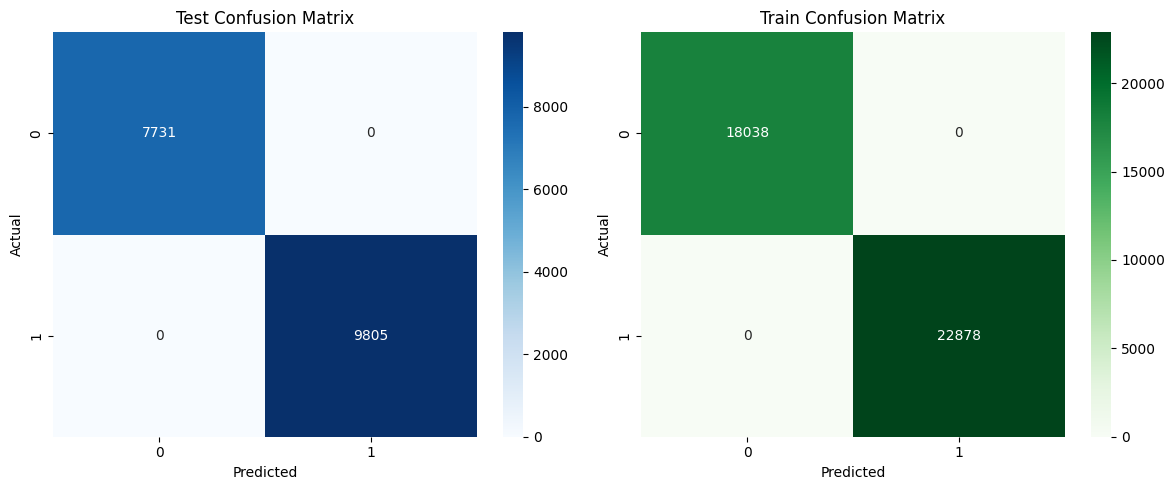

In [161]:
cm_test = confusion_matrix(y_test_funapprox, y_pred_test_funapprox)
cm_train = confusion_matrix(y_train_funapprox, y_pred_train_funapprox)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Test confusion matrix
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Test Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Train confusion matrix
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Train Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [162]:
from sklearn.metrics import roc_curve, roc_auc_score
model2_svm_proba = grid_search.best_estimator_.predict_proba(X_test_funapprox)[:, 1]
fpr2_svm, tpr2_svm, _ = roc_curve(y_test_funapprox, model2_svm_proba)
auc2_svm = roc_auc_score(y_test_funapprox, model2_svm_proba)

###
<hr style="border:2px solid blue">


### After applying feature selection

In [163]:
X_train_funapprox_rfe = rfe.transform(X_train_funapprox)
X_test_funapprox_rfe = rfe.transform(X_test_funapprox)
grid_search.fit(X_train_funapprox_rfe, y_train_funapprox)


GridSearchCV(cv=3,
             estimator=SVC(class_weight='balanced', probability=True,
                           random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'kernel': ['poly', 'rbf']},
             scoring='f1_weighted')

In [164]:
grid_search.best_params_

{'C': 100, 'degree': 2, 'kernel': 'rbf'}

In [165]:
grid_search.best_score_

np.float64(0.9990469034167044)

In [166]:
y_pred_test_funapprox= grid_search.best_estimator_.predict(X_test_funapprox_rfe)
y_pred_train_funapprox= grid_search.best_estimator_.predict(X_train_funapprox_rfe)

In [167]:
print("=================Test================")
print(classification_report(y_test_funapprox, y_pred_test_funapprox))
print("=================Train================")
print(classification_report(y_train_funapprox, y_pred_train_funapprox))

=================Test================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7731
           1       1.00      1.00      1.00      9805

    accuracy                           1.00     17536
   macro avg       1.00      1.00      1.00     17536
weighted avg       1.00      1.00      1.00     17536

=================Train================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18038
           1       1.00      1.00      1.00     22878

    accuracy                           1.00     40916
   macro avg       1.00      1.00      1.00     40916
weighted avg       1.00      1.00      1.00     40916



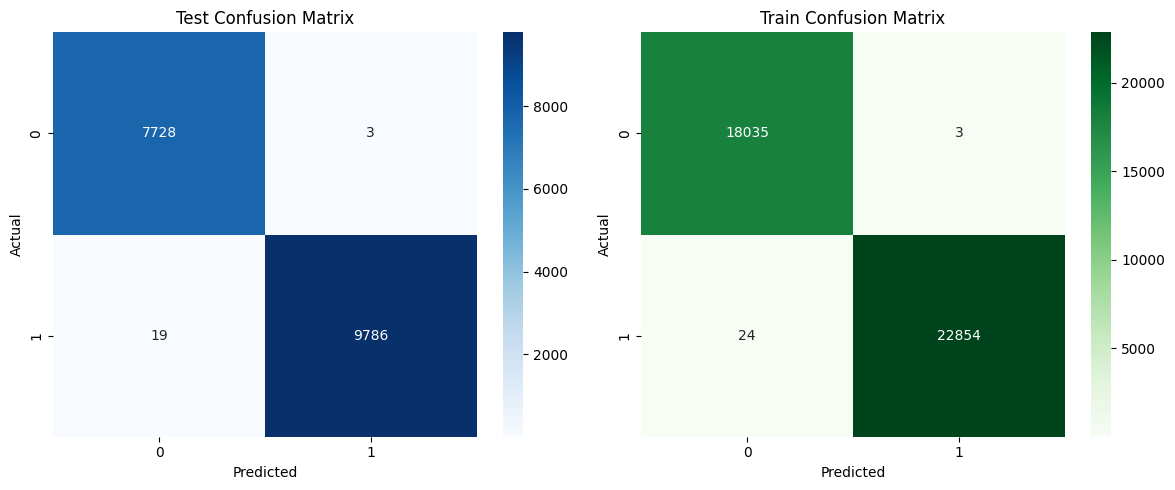

In [168]:
cm_test = confusion_matrix(y_test_funapprox, y_pred_test_funapprox)
cm_train = confusion_matrix(y_train_funapprox, y_pred_train_funapprox)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Test confusion matrix
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Test Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Train confusion matrix
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Train Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [169]:
from sklearn.metrics import roc_curve, roc_auc_score
model3_svm_proba = grid_search.best_estimator_.predict_proba(X_test_funapprox_rfe)[:, 1]
fpr3_svm, tpr3_svm, _ = roc_curve(y_test_funapprox, model3_svm_proba)
auc3_svm = roc_auc_score(y_test_funapprox, model3_svm_proba)

###
<hr style="border:2px solid blue">


### Comparing Models
- SVM performed very well likely because it can make non-linear decision boundaries.
- The tuned SVM model achieved the best performance overall

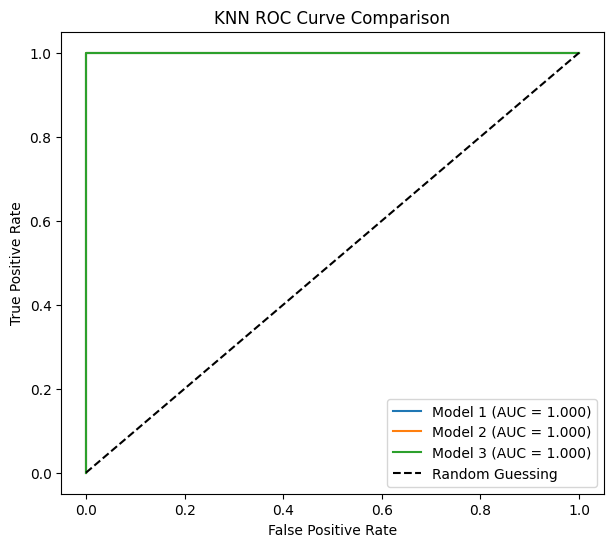

In [170]:
plt.figure(figsize=(7, 6))

plt.plot(fpr1_svm, tpr1_svm, label=f"Model 1 (AUC = {auc1_svm:.3f})")
plt.plot(fpr2_svm, tpr2_svm, label=f"Model 2 (AUC = {auc2_svm:.3f})")
plt.plot(fpr3_svm, tpr3_svm, label=f"Model 3 (AUC = {auc3_svm:.3f})")


plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()


###
<hr style="border:2px solid blue">


# 4. Conclusion

## the best-performing version of each model

- fpr1_decisiontree, tpr1_decisiontree, auc1_decisiontree
- fpr1_randomforest, tpr1_randomforest, auc1_randomforest
- fpr1_lr, tpr1_lr, auc1_lr
- fpr2_knn, tpr2_knn, auc2_knn
- fpr1_naive, tpr1_naive, auc1_naive
- fpr2_svm, tpr2_svm, auc2_svm

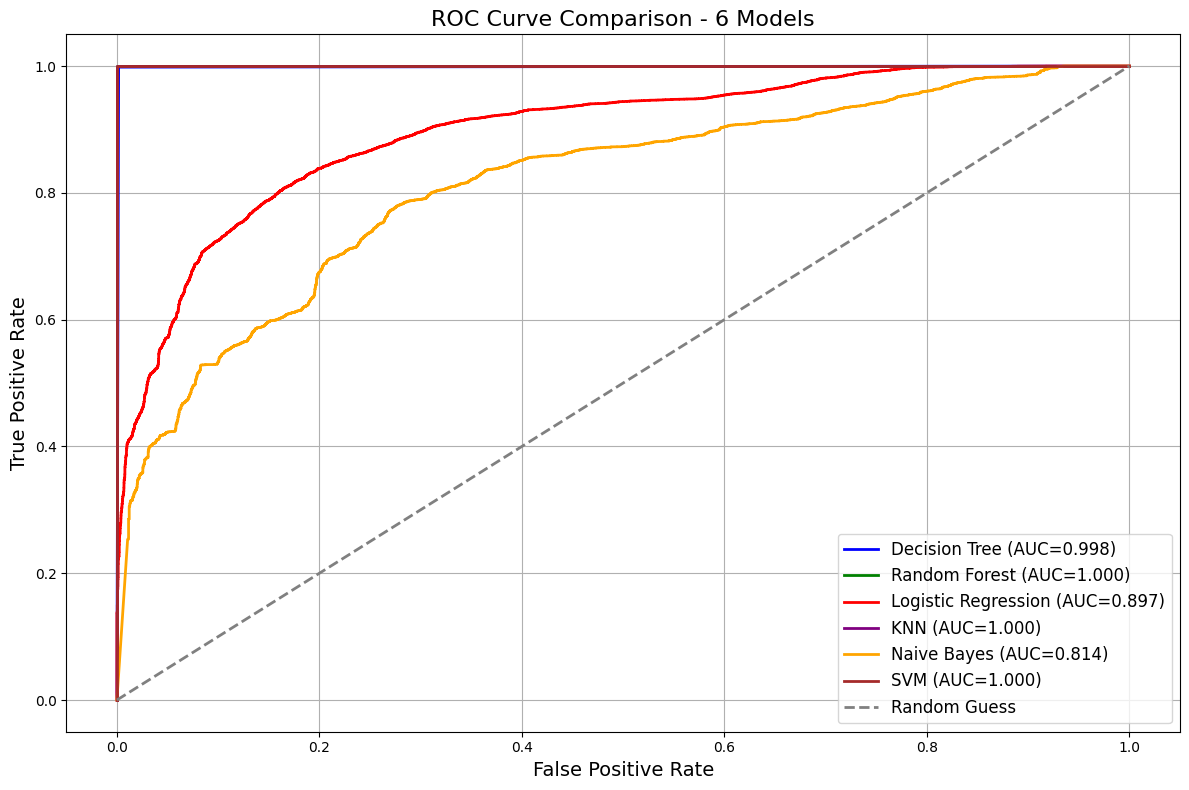

In [171]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  


plt.plot(fpr1_decisiontree, tpr1_decisiontree, color="blue", lw=2, label=f"Decision Tree (AUC={auc1_decisiontree:.3f})")
plt.plot(fpr1_randomforest, tpr1_randomforest, color="green", lw=2, label=f"Random Forest (AUC={auc1_randomforest:.3f})")
plt.plot(fpr1_lr, tpr1_lr, color="red", lw=2, label=f"Logistic Regression (AUC={auc1_lr:.3f})")
plt.plot(fpr2_knn, tpr2_knn, color="purple", lw=2, label=f"KNN (AUC={auc2_knn:.3f})")
plt.plot(fpr1_naive, tpr1_naive, color="orange", lw=2, label=f"Naive Bayes (AUC={auc1_naive:.3f})")
plt.plot(fpr2_svm, tpr2_svm, color="brown", lw=2, label=f"SVM (AUC={auc2_svm:.3f})")


plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--", label="Random Guess")


plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve Comparison - 6 Models", fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()



##  **`Conclusion`**

After testing all models, the results show that:  
- ` SVM, Random Forest, and KNN performed the best overall`